In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
from fitsio import FITS,FITSHDR
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import stats
from astropy.table import Table, Column
from astropy.io import ascii
from scipy.interpolate import griddata
from sklearn import neighbors
import matplotlib.lines as mlines
from scipy.stats import kde
import matplotlib.colors as clr
import matplotlib as mpl


In [2]:
g_array = np.arange(21.9,22.8,.01)

In [3]:
g_i_array = np.arange(0.11,0.45,.01)

In [4]:
len(g_i_array)

34

In [5]:
len(g_array)

91

In [6]:
g_1x = np.ones(len(g_array))*0.11

In [7]:
g_2x = np.ones(len(g_array))*0.44

In [8]:
gi_1y = np.ones(len(g_i_array))*21.9

In [9]:
gi_2y = np.ones(len(g_i_array))*22.8

In [13]:
def plot(filename):
    #read fits file
    fx = fitsio.FITS(filename)
    objs = fx[1].read()

    newstr = ''.join((ch if ch in '0123456789' else ' ') for ch in filename)
    field_number = [int(i) for i in newstr.split()][0]
    
    u = (objs["U"]-(4.239*objs["EBV"]))
    g = (objs["G"]-(3.303*objs["EBV"]))
    i = (objs["I"]-(1.263*objs["EBV"]))
    r = (objs["R"]-(2.285*objs["EBV"]))
    selected = np.where((i<=30)&(g<=30)&(objs['CHI']<3)&(abs(objs['SHARP'])<1)&(objs['PROB']>.8))
    g,i = g[selected],i[selected]

    

    fig, ax = plt.subplots(figsize=(15,10))
    hess = stats.binned_statistic_2d(g-i, g, None, 'count',bins=1000)

    im = ax.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='gray',norm=clr.LogNorm(),label='Density of Field Stars')
    
    cb = fig.colorbar(im,ax=ax)
    
    ax.plot(g_1x,g_array,'r',lw=5)
    ax.plot(g_2x,g_array,'r',lw=5)
    ax.plot(g_i_array,gi_1y,'r',lw=5)
    ax.plot(g_i_array,gi_2y,'r',lw=5)
    ax.set_title('Field '+str(field_number),fontsize=50)
    ax.set_xlabel('$(g-i)_0$',fontsize=50)
    ax.set_ylabel('$(g)_0$',fontsize=50)
    ax.tick_params(axis='both', which='major', labelsize=35)
    ax.set_ylim(26,14)
    ax.set_xlim(-1,4)
    #plt.legend(fontsize=20)
    ticklabs = cb.ax.get_yticks()
    #ticklabs2 = cb2.ax.get_yticklabels()
    
    cb.ax.set_yticklabels(ticklabs, fontsize=25)
    
    cb.ax.set_title('Feild \n Density',fontsize=32)
    
    plt.show(block=False)

    return 0

In [14]:
lmc = [32,34,37,40,46,49,51,156,24,26,27,28,29,31,33,44,52,53,54,55,56,57,58,59,60,61,63,64,66,68]

# Below, the density of stars in the LMC SMASH fields I study

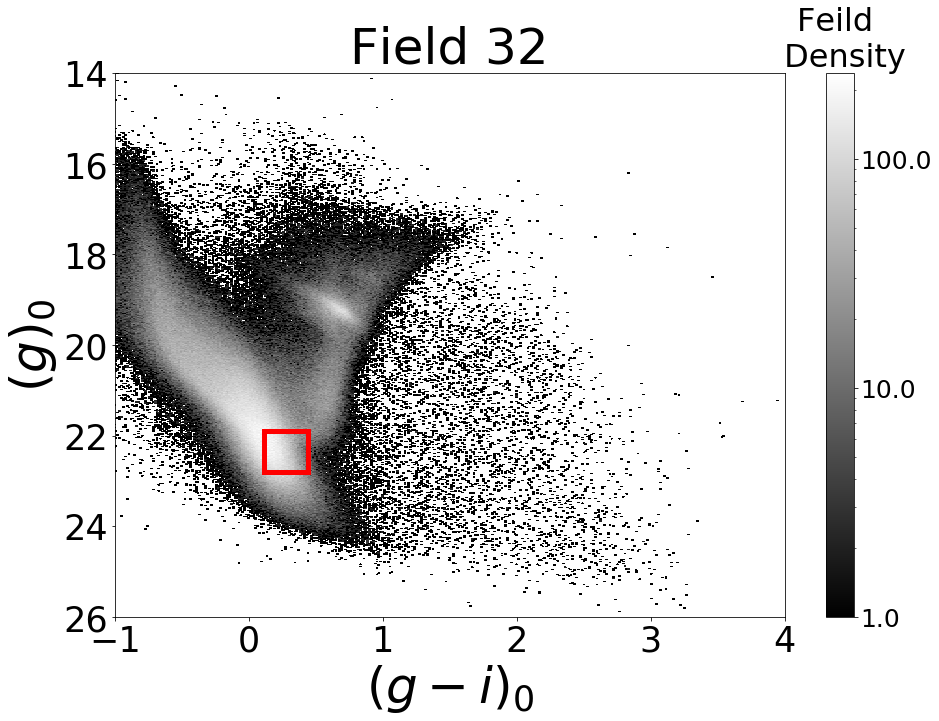

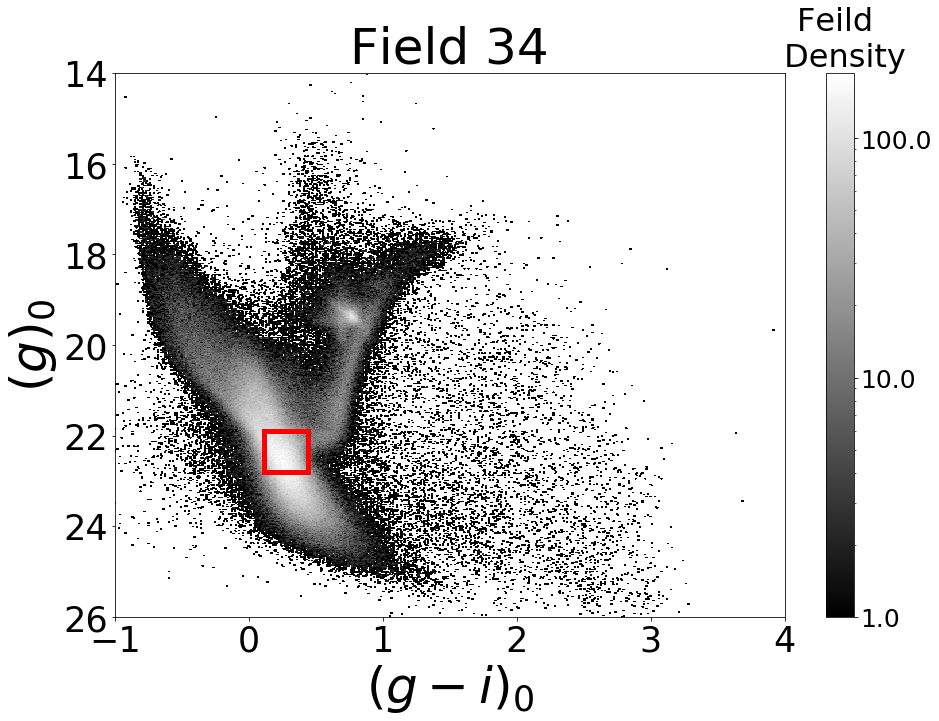

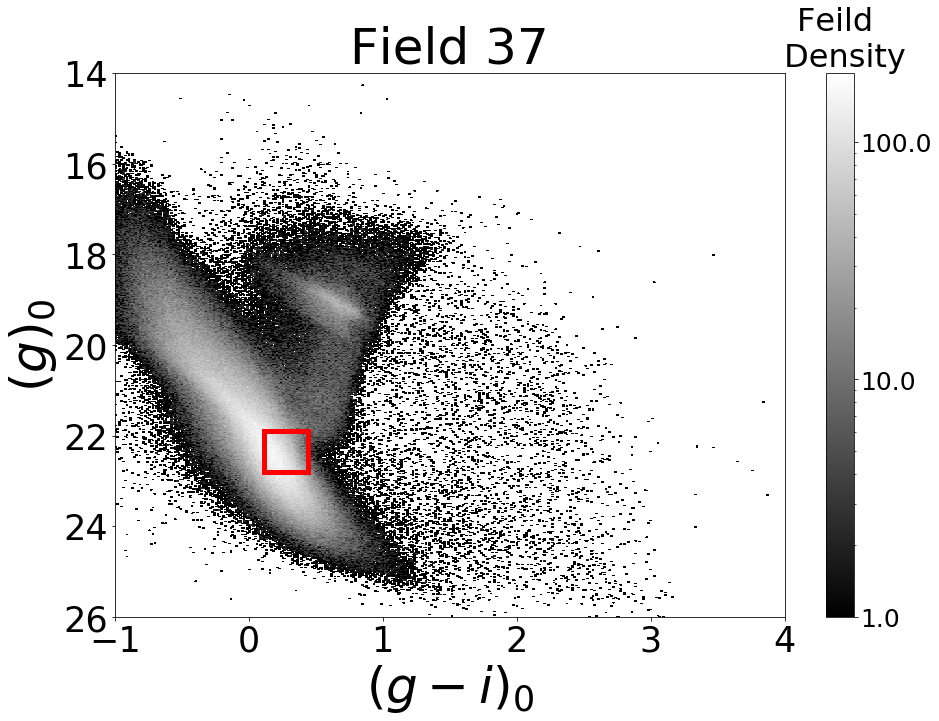

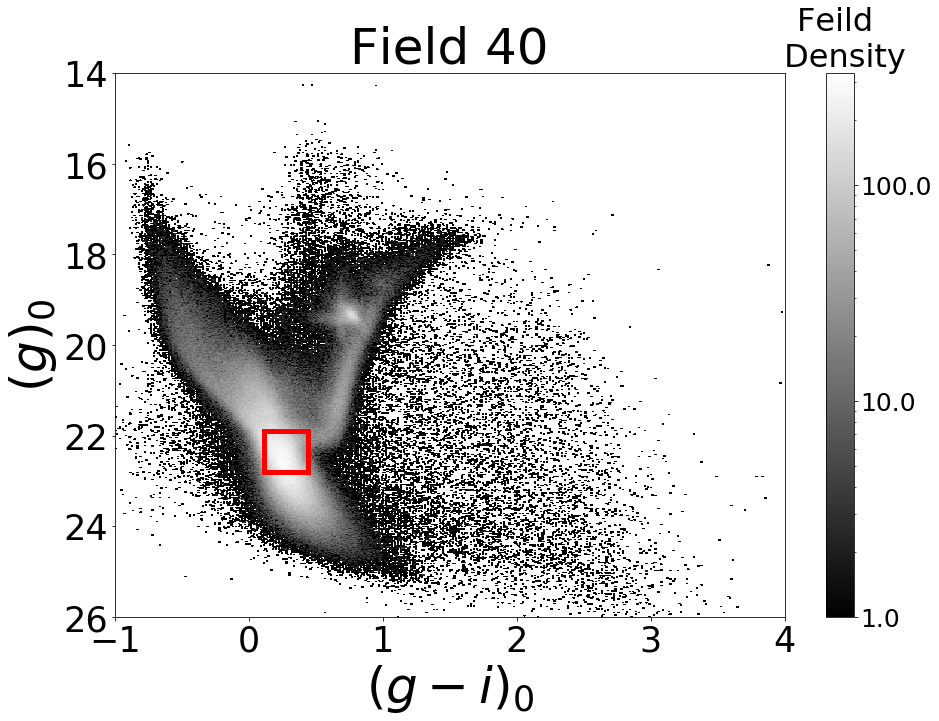

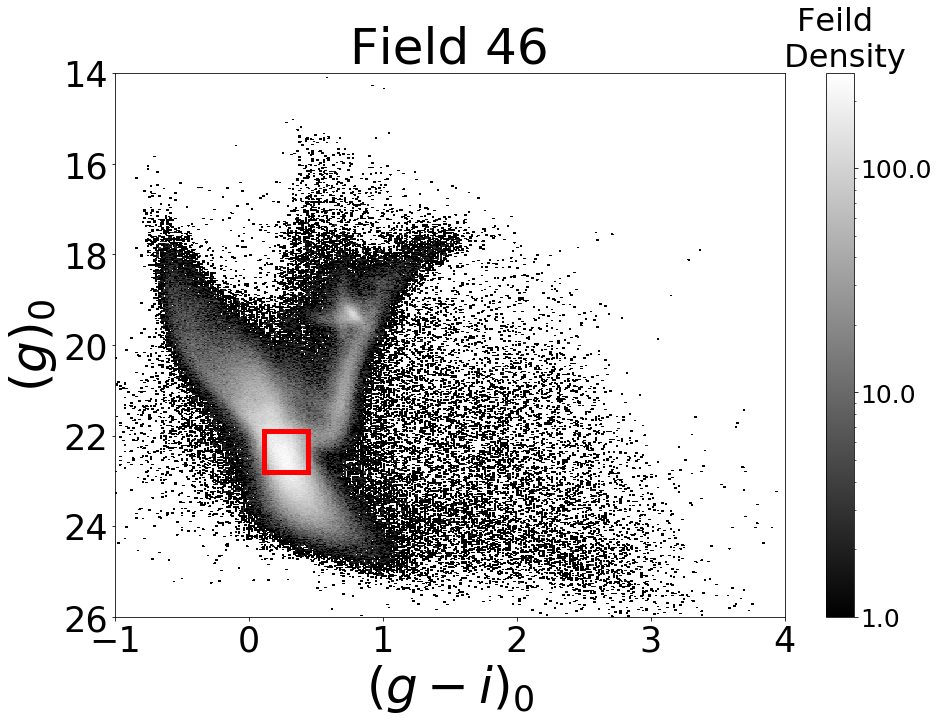

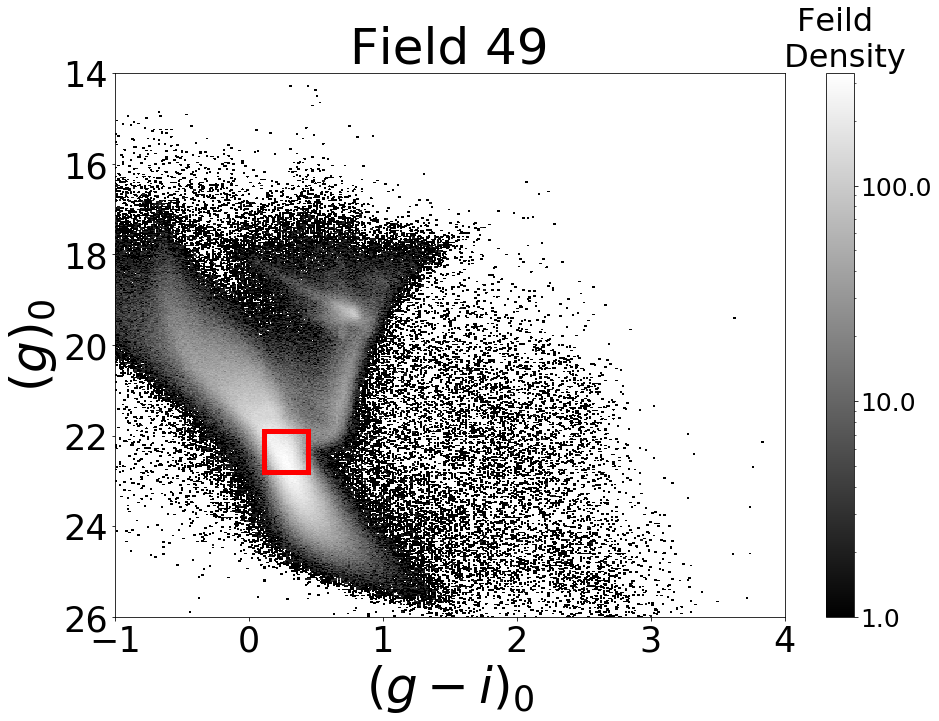

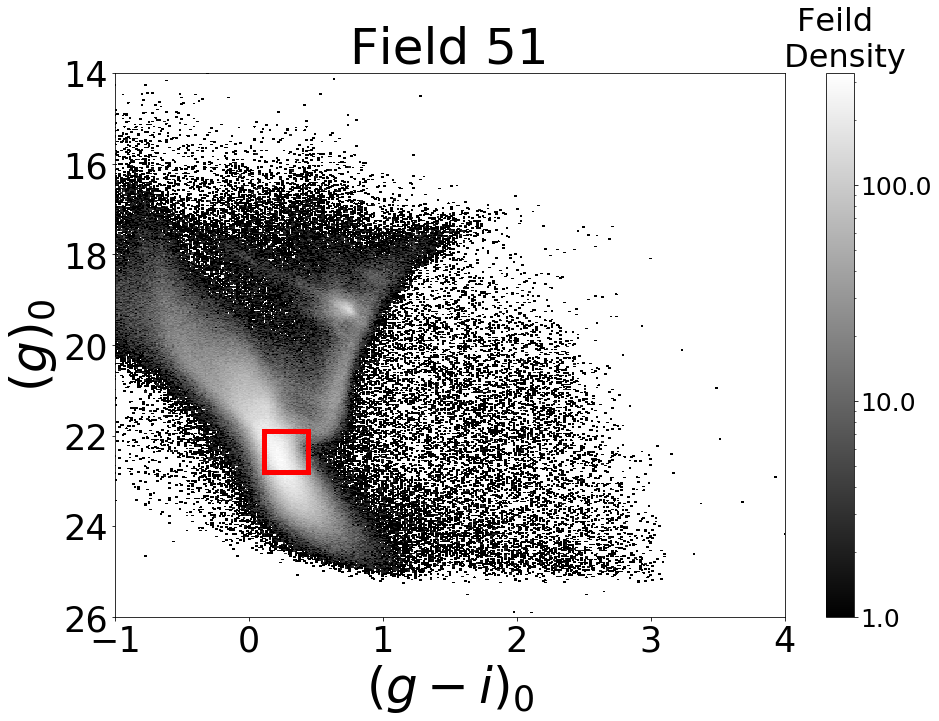

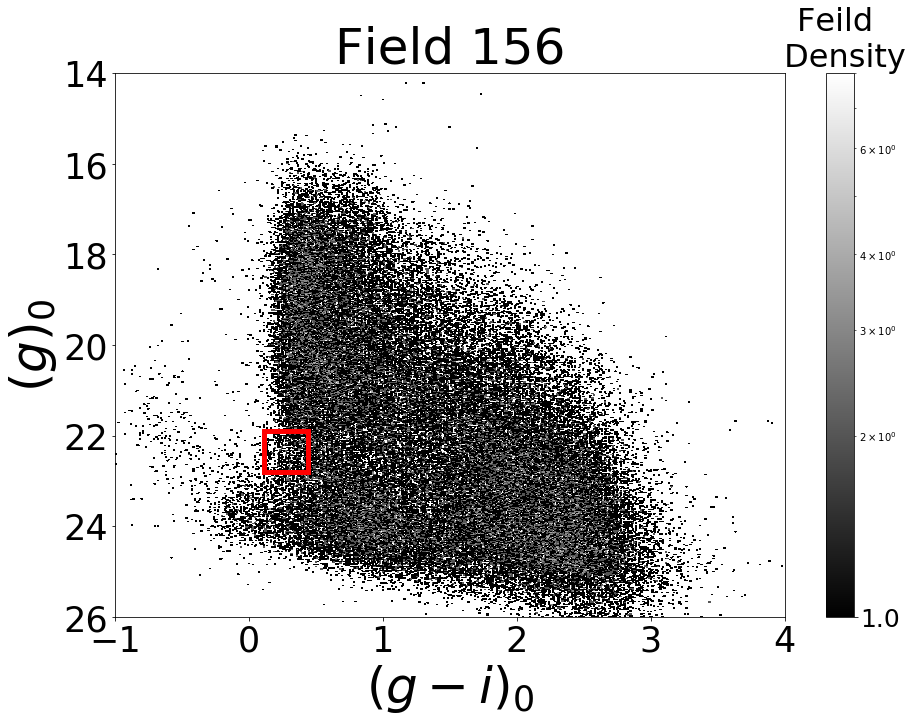

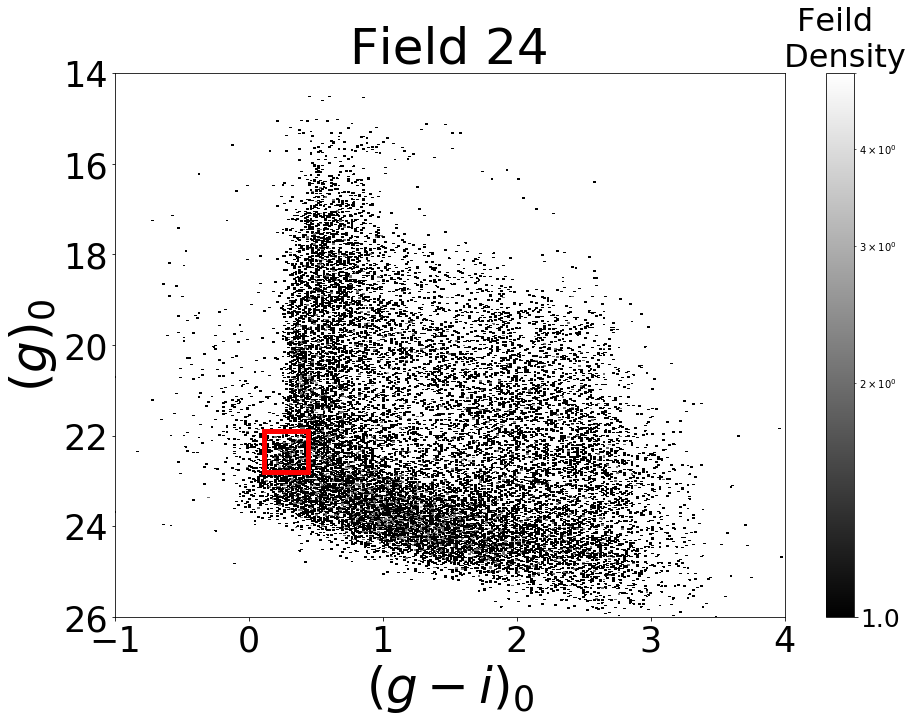

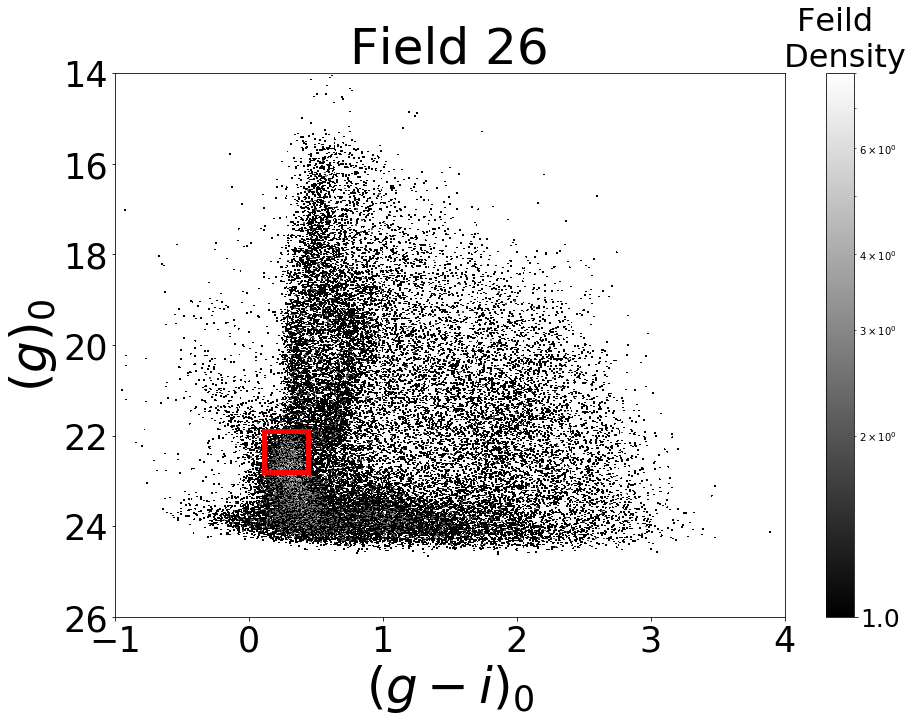

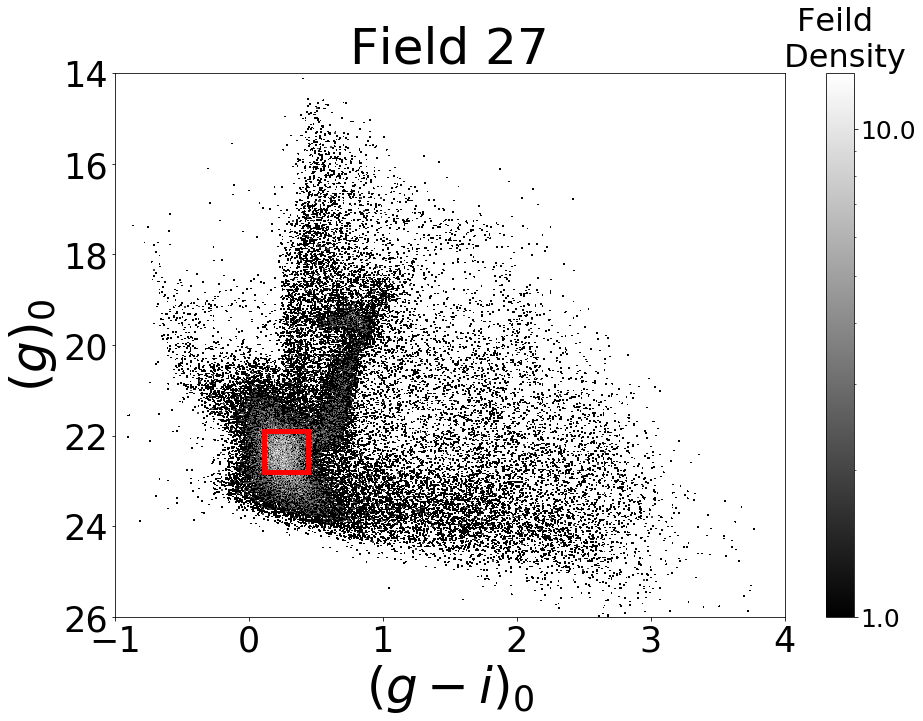

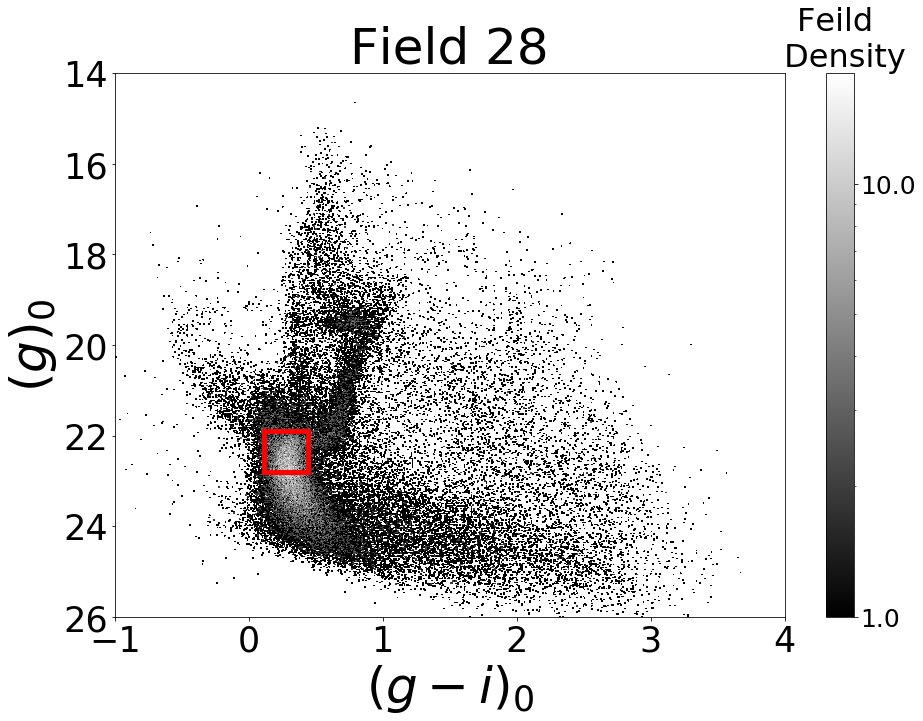

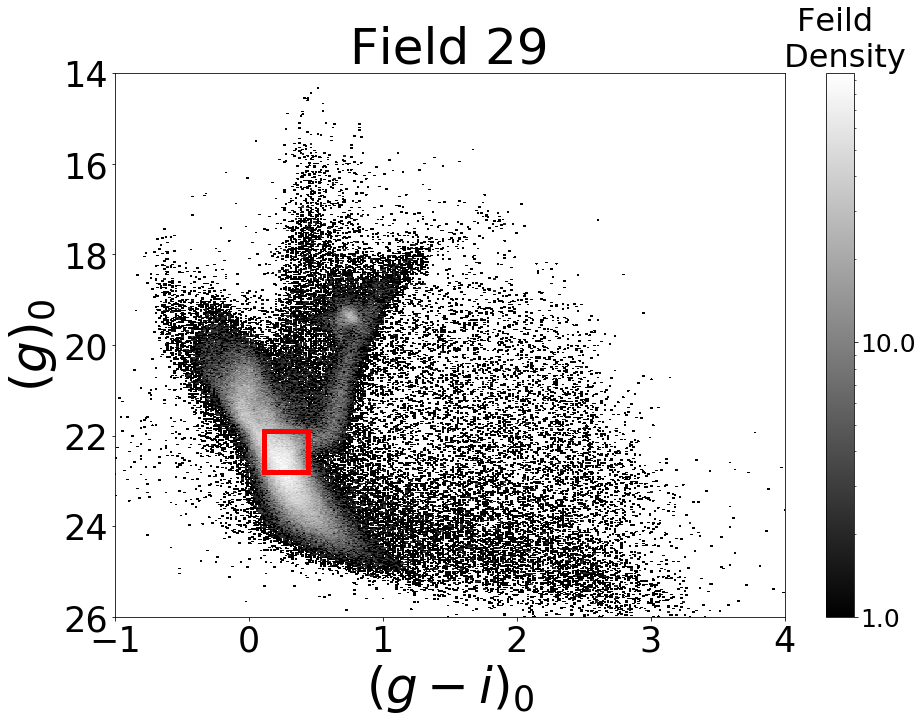

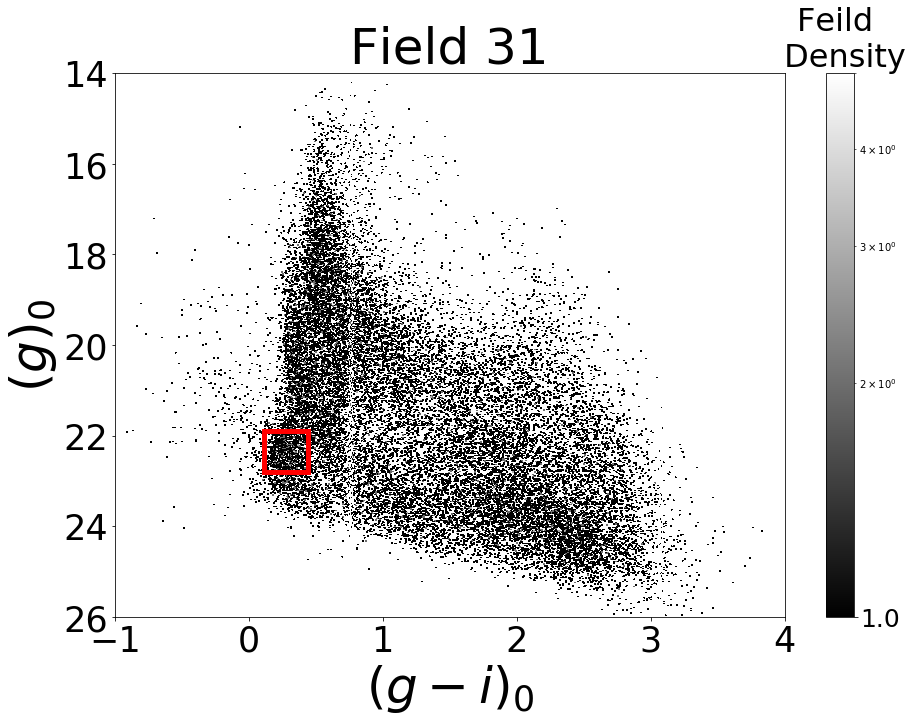

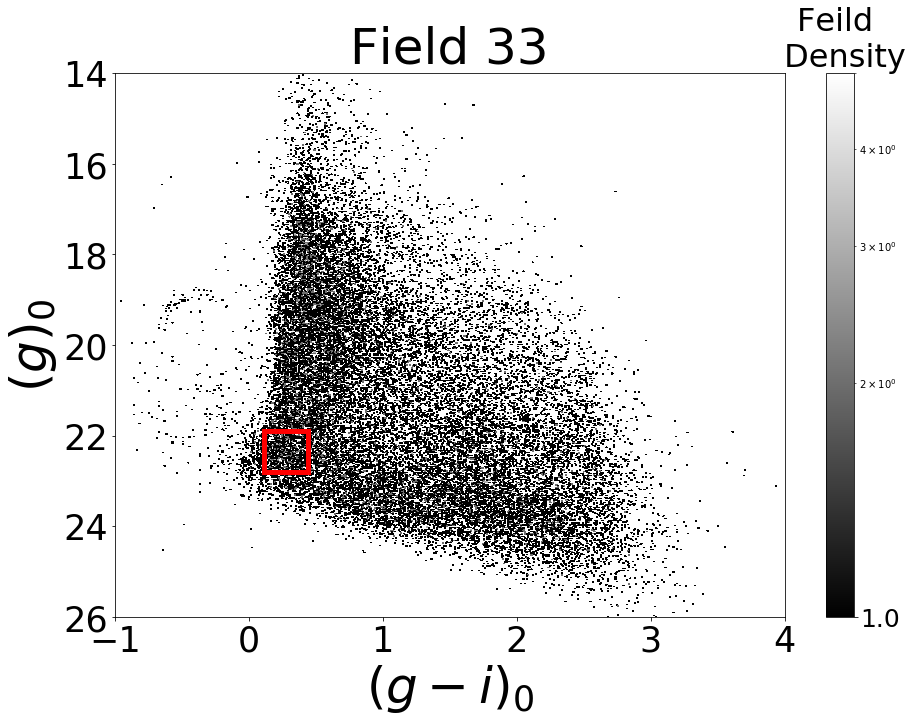

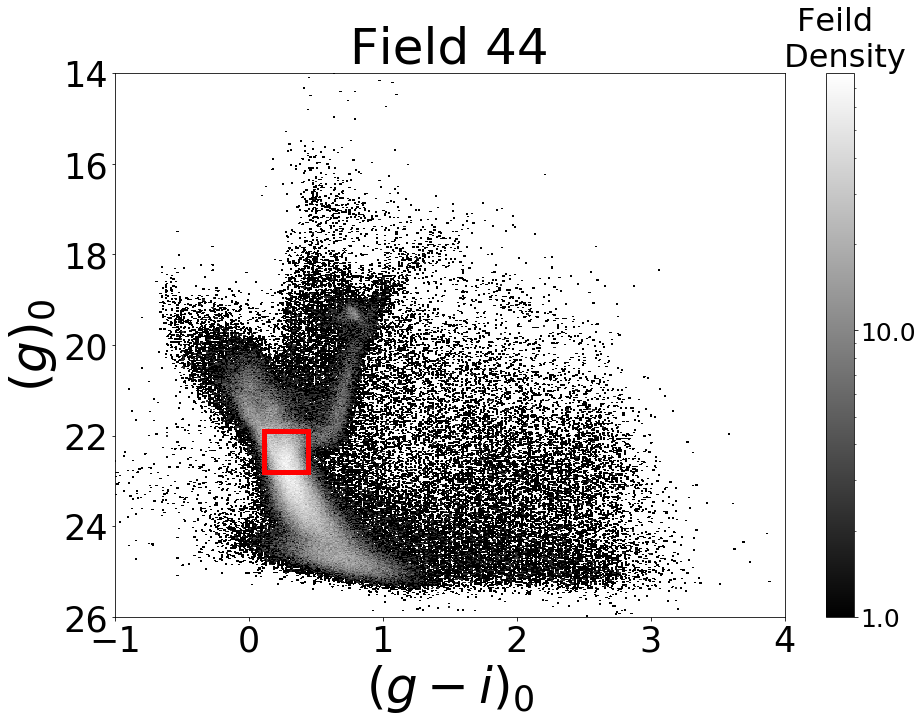

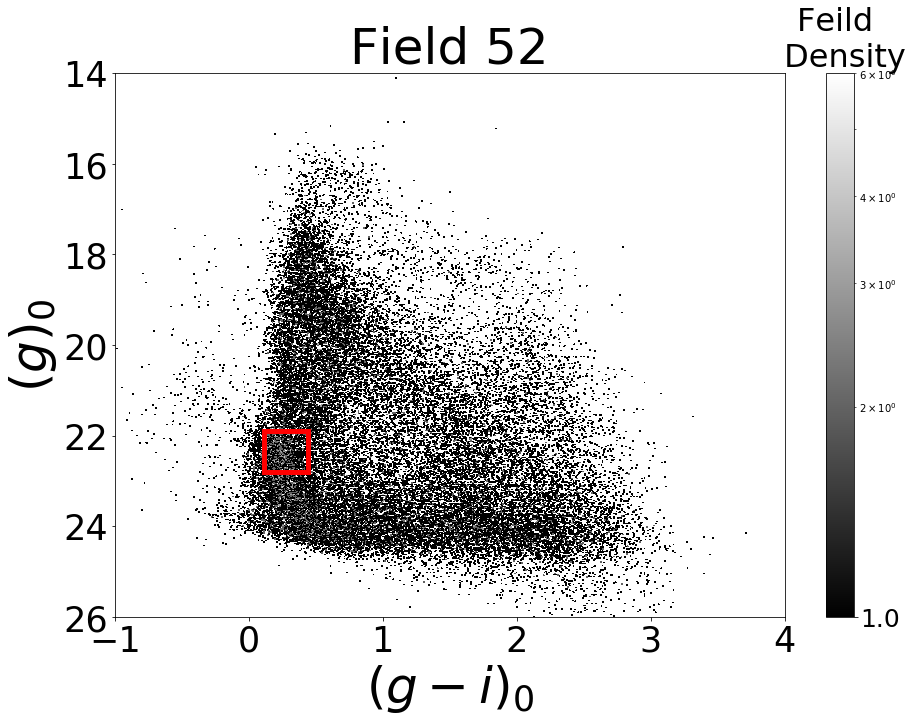

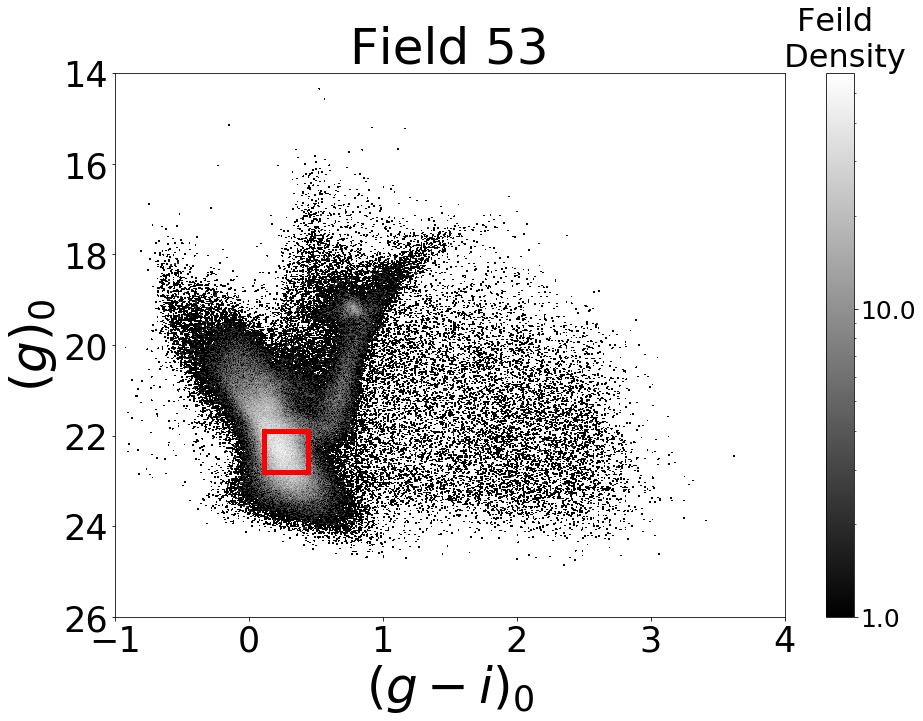

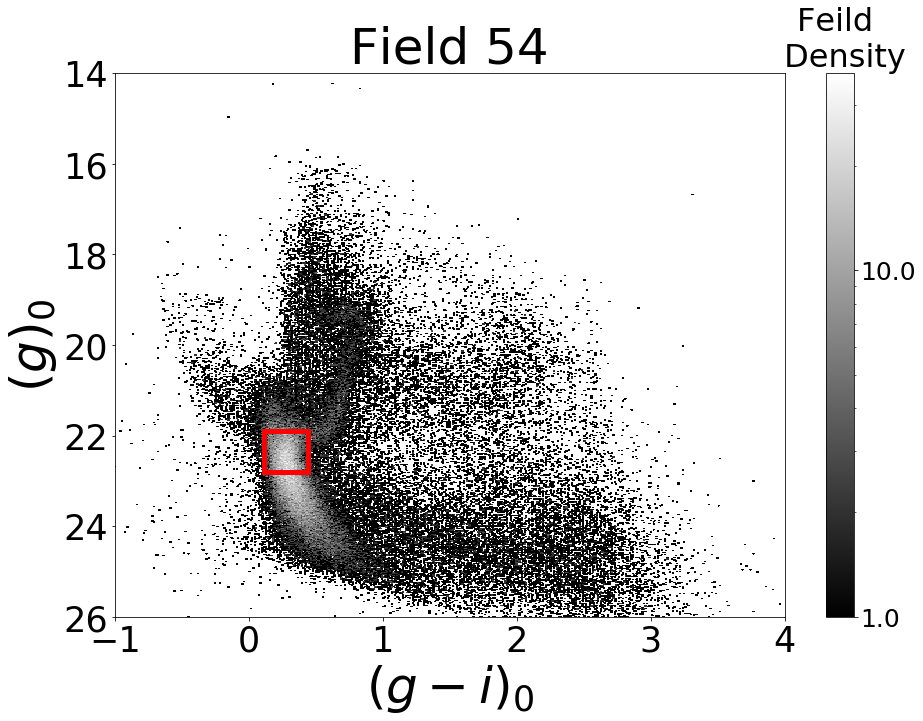

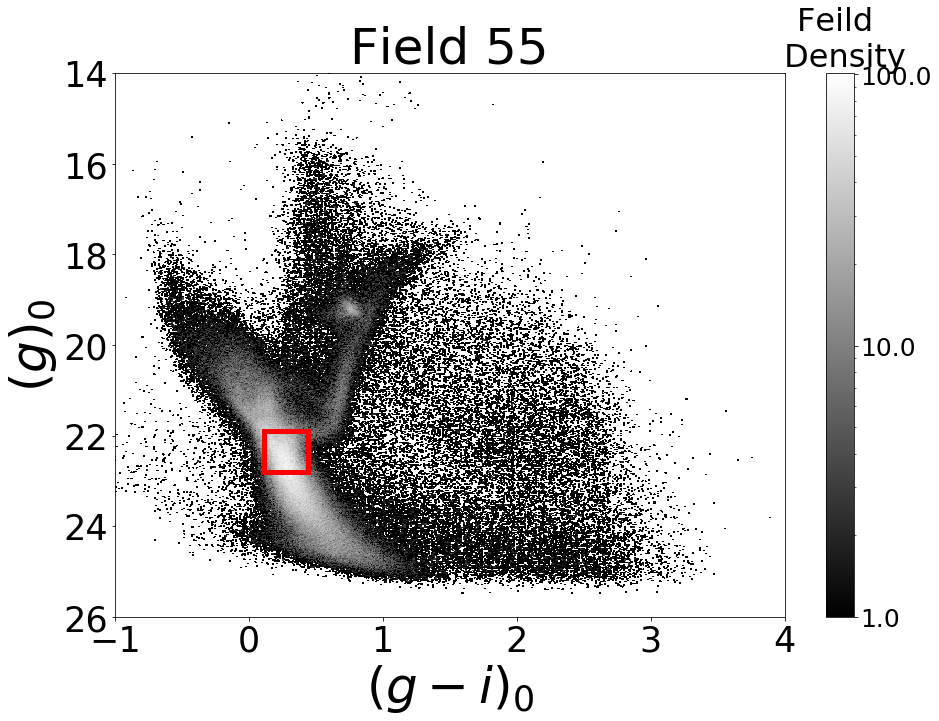

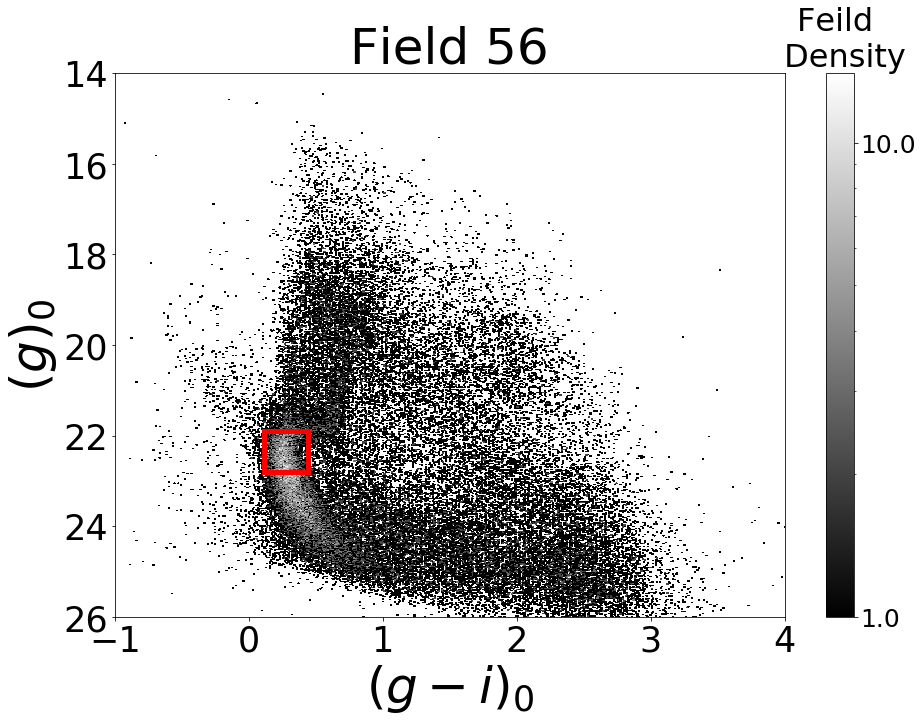

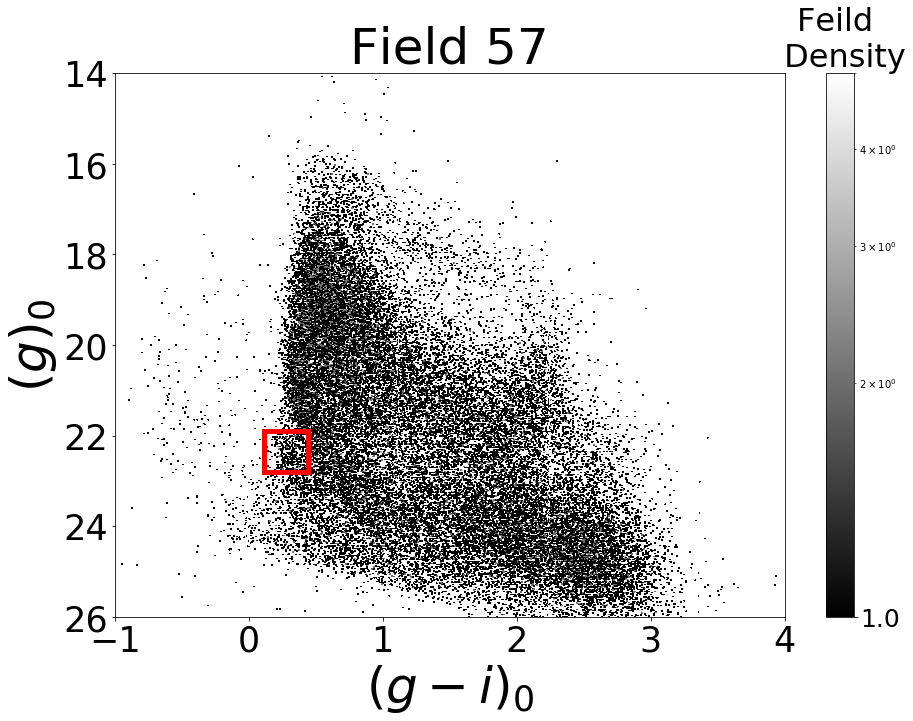

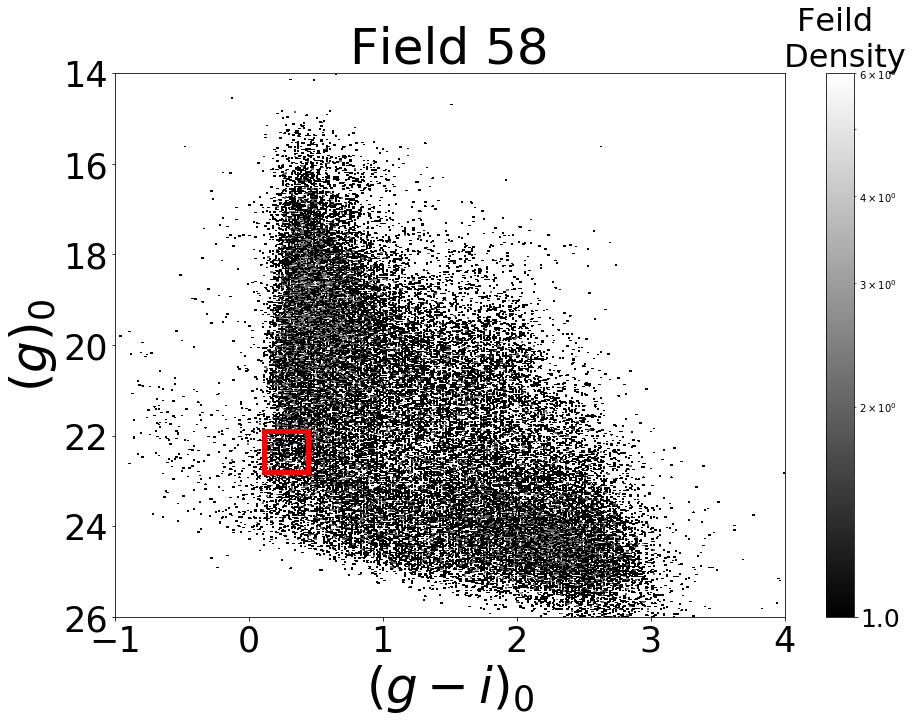

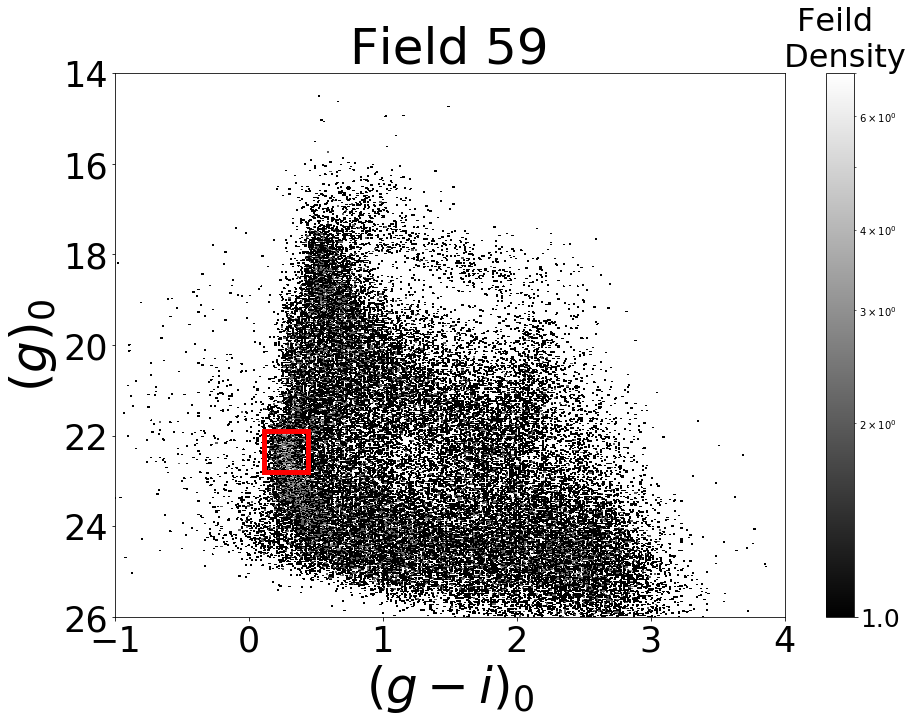

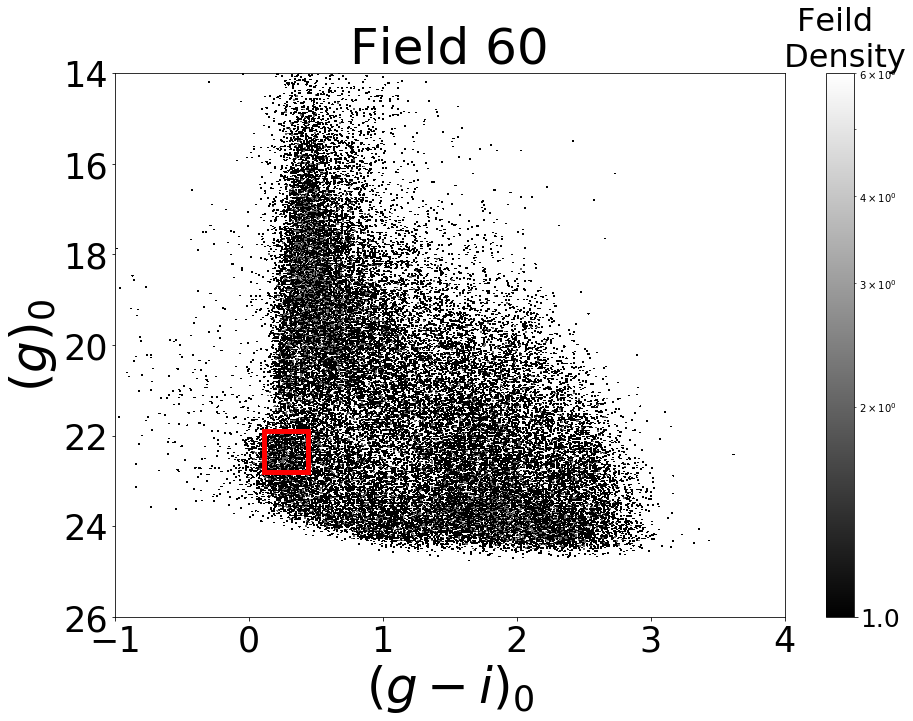

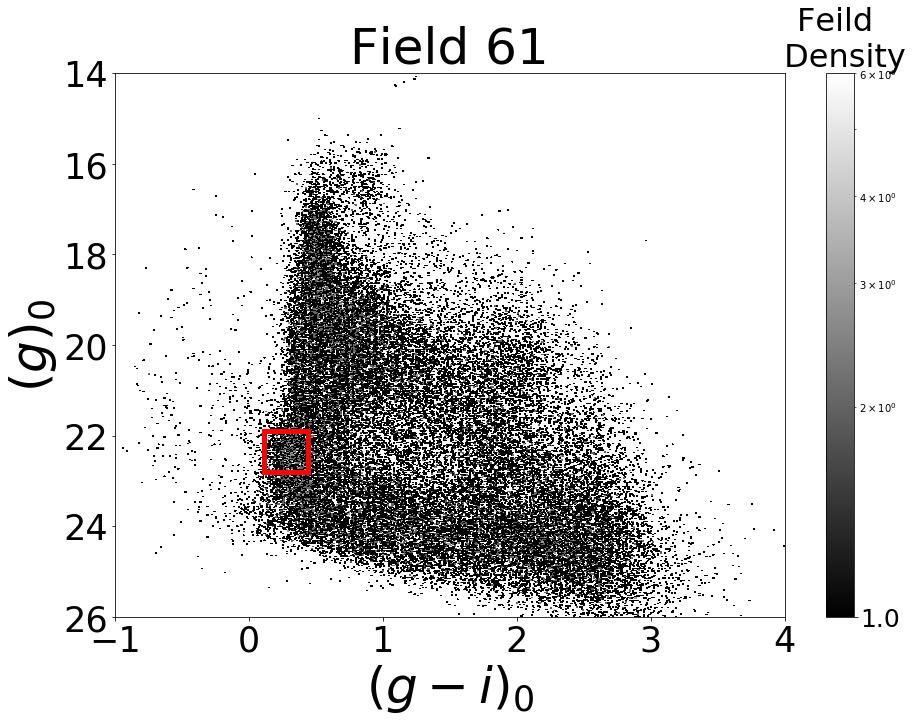

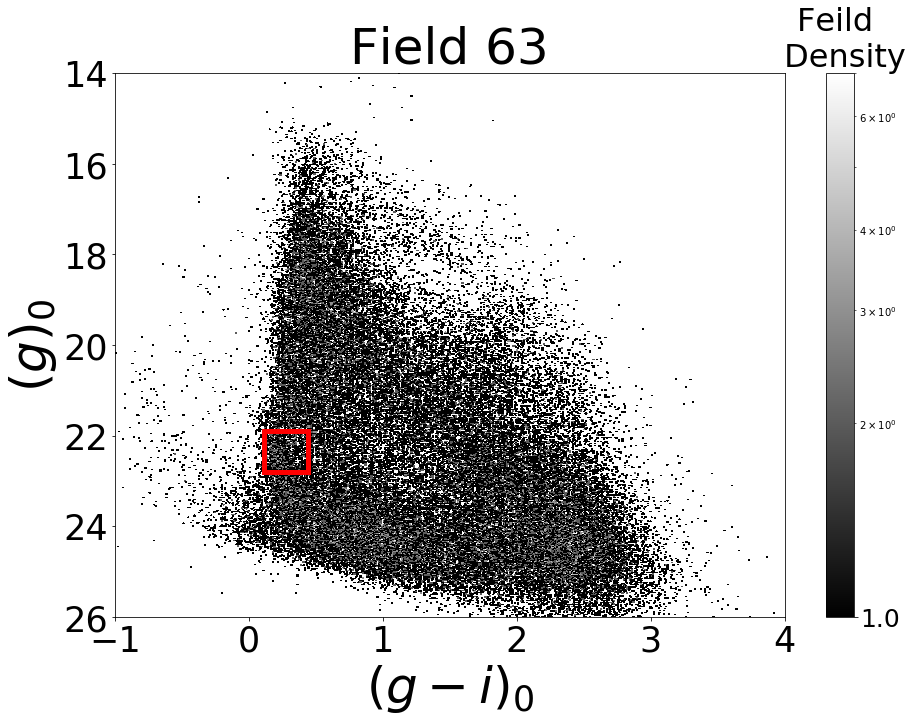

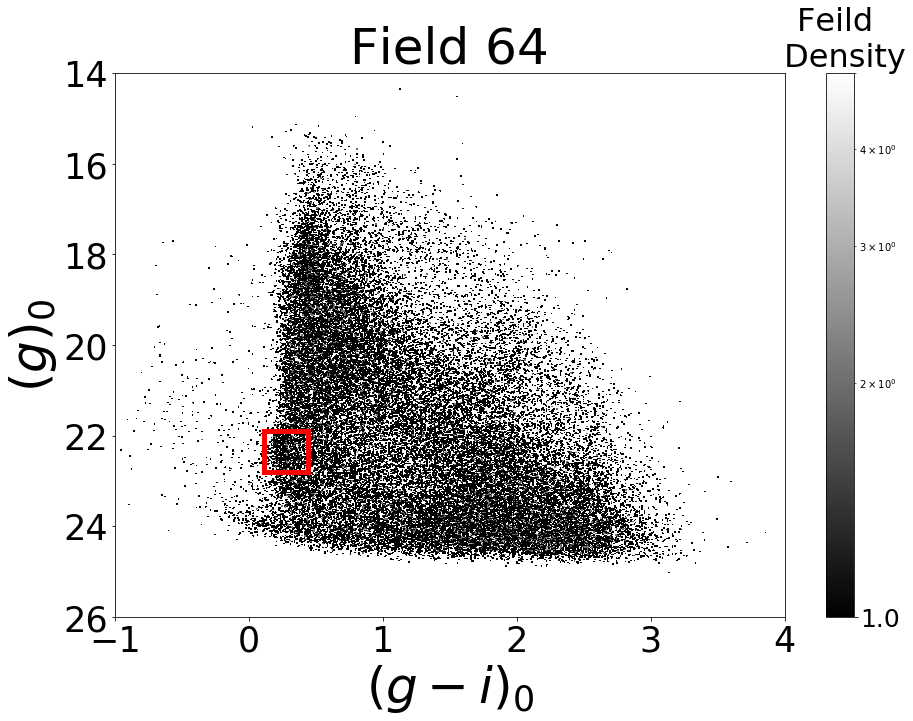

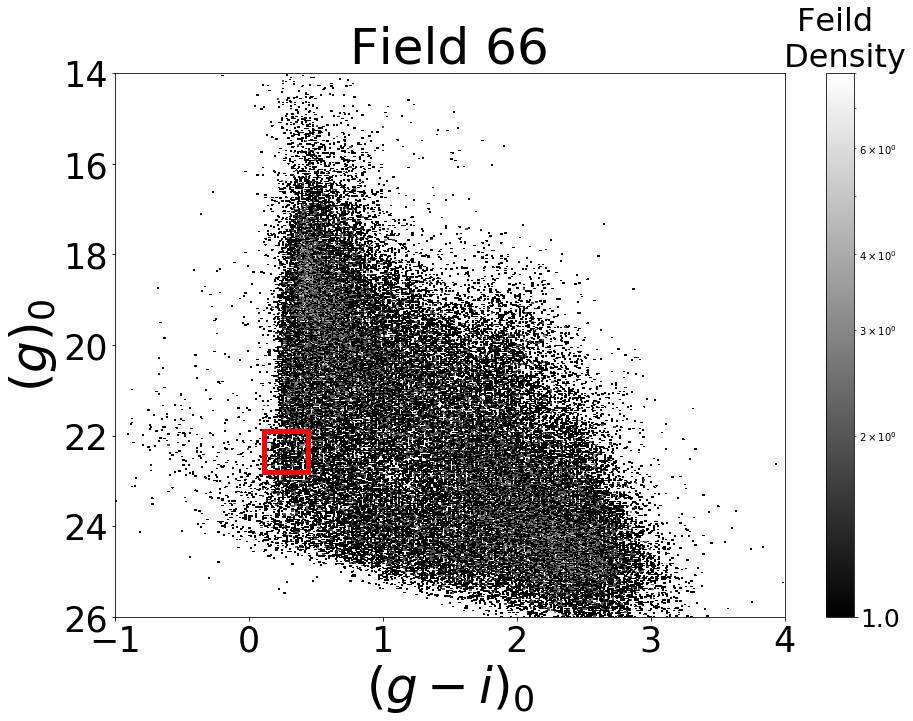

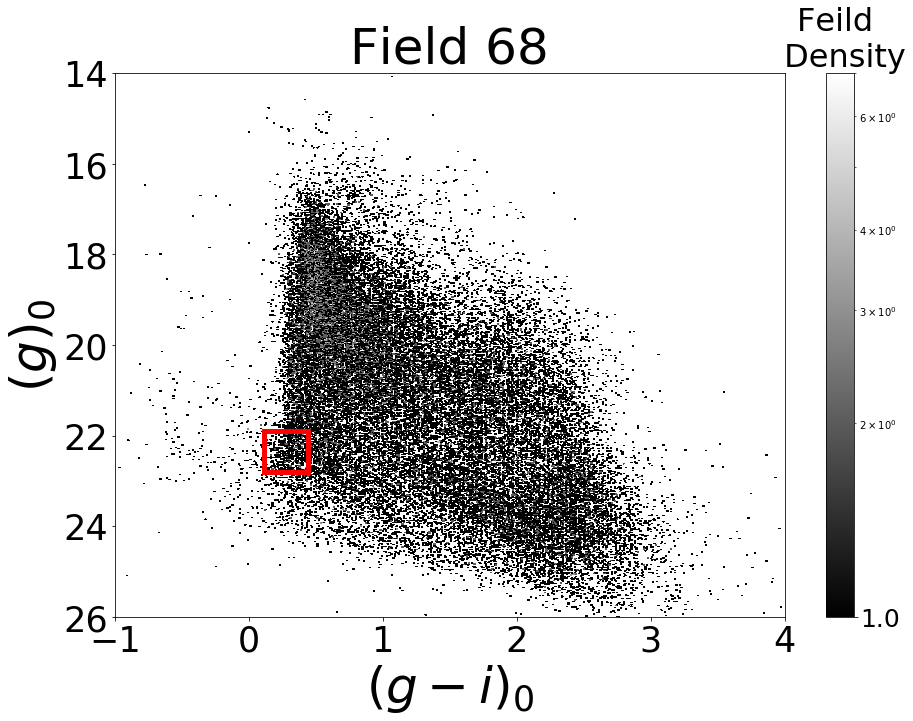

In [15]:
for number in lmc:
    plot('/Users/amyel/research/SMASH_project/datafiles/SMASH_fields/vsix/starsthree/Field{}_allobj_deep_stars.fits.gz'.format(number))


In [16]:
smc = [12,14,15,16,19,2,3,4,5,7,9,1,13,149,150,176,177,178,18,20,21,22,8]

# Below, the density of stars in the SMASH SMC fields I study

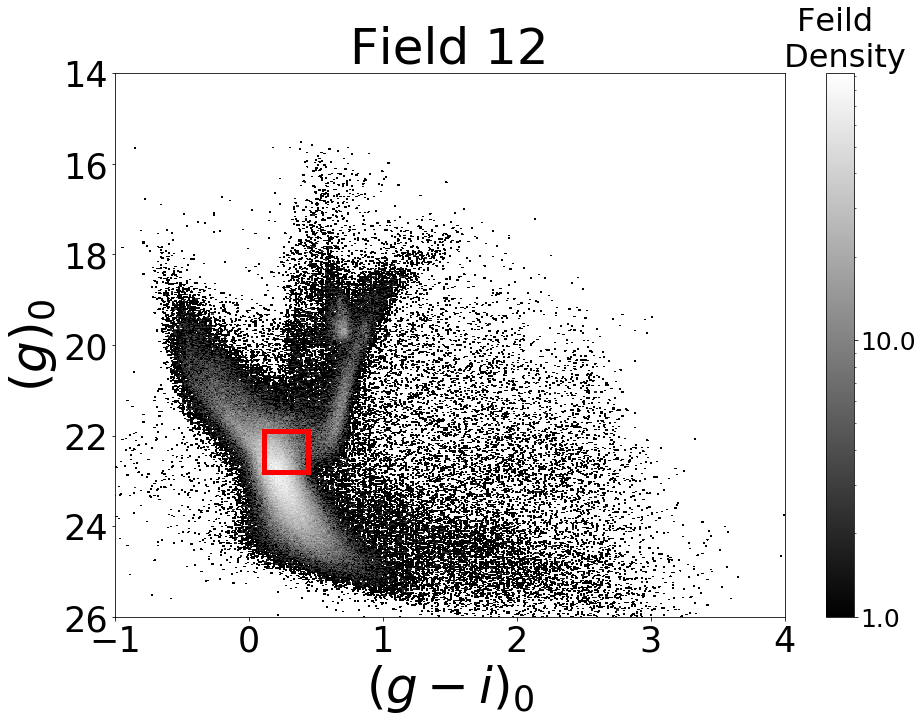

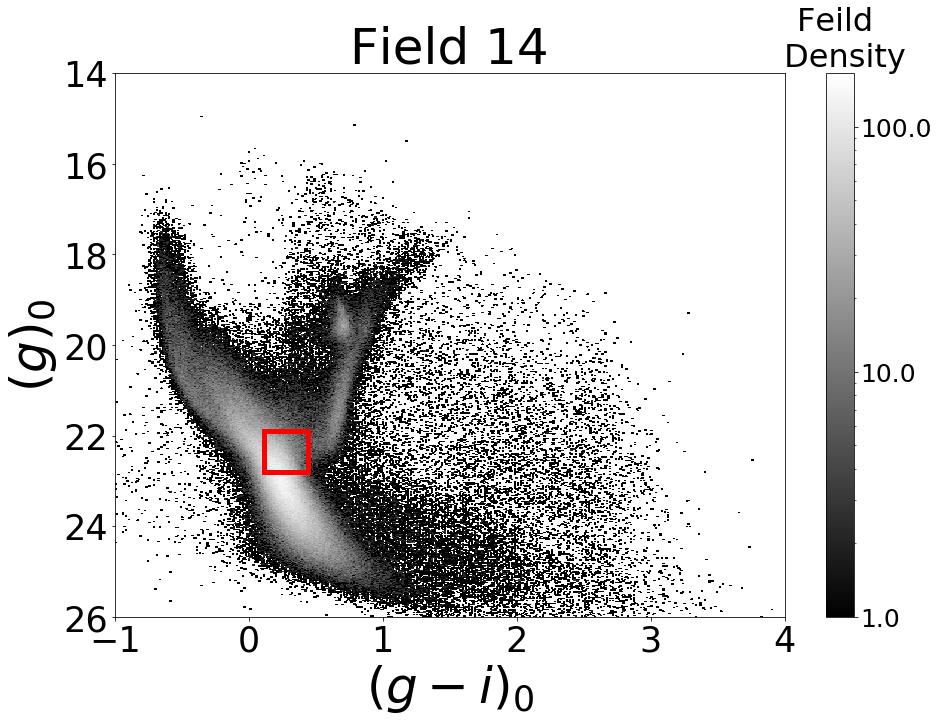

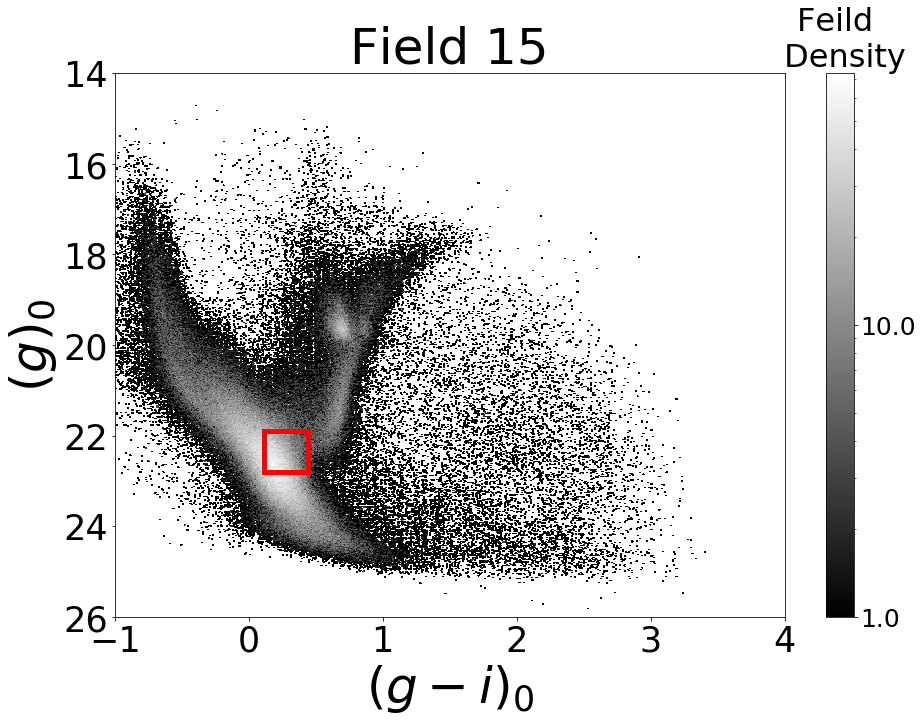

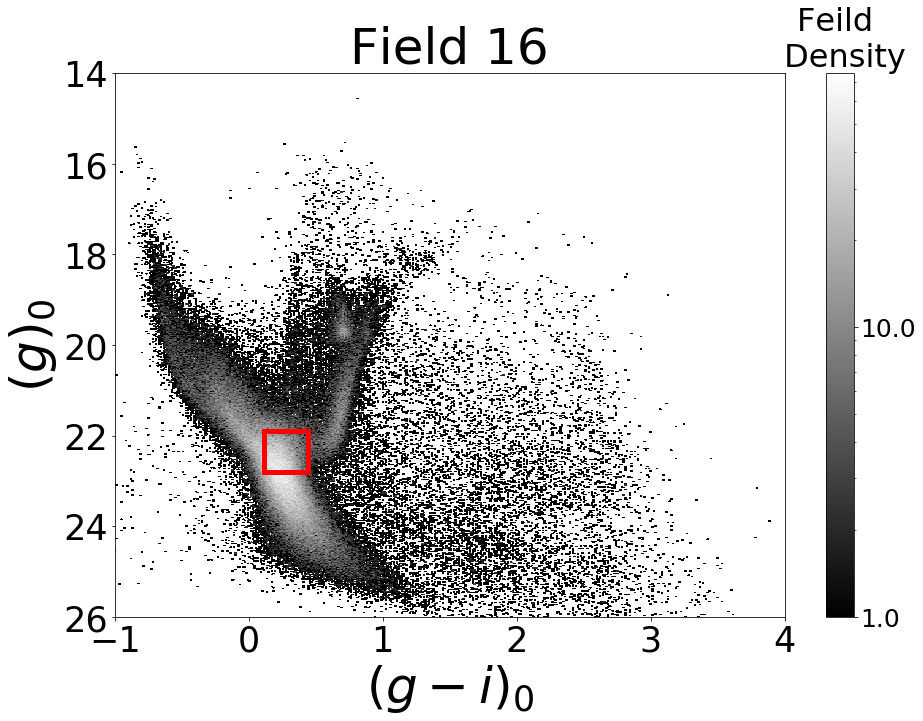

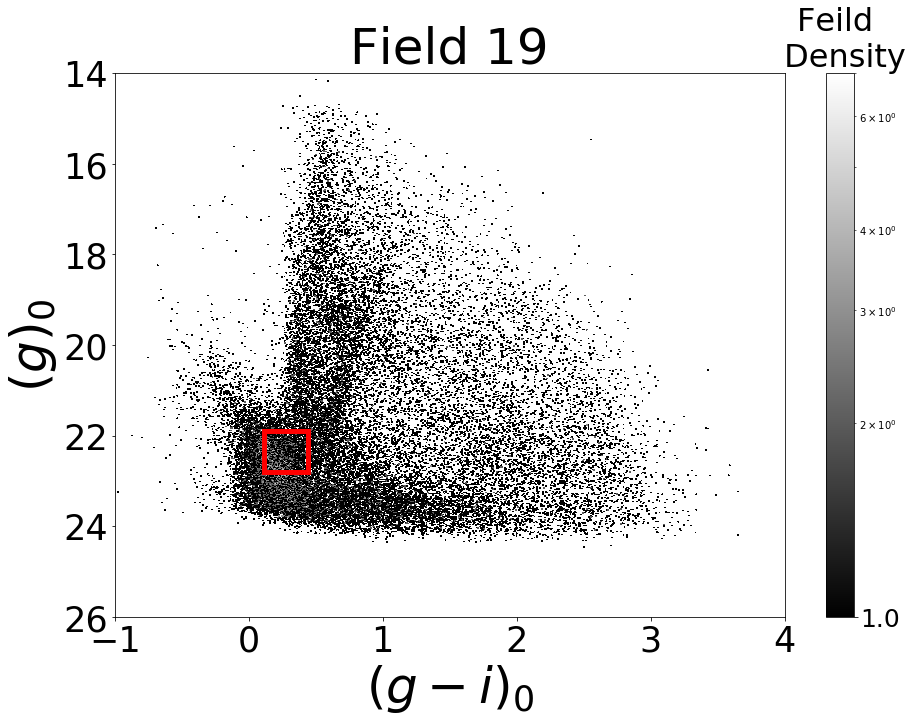

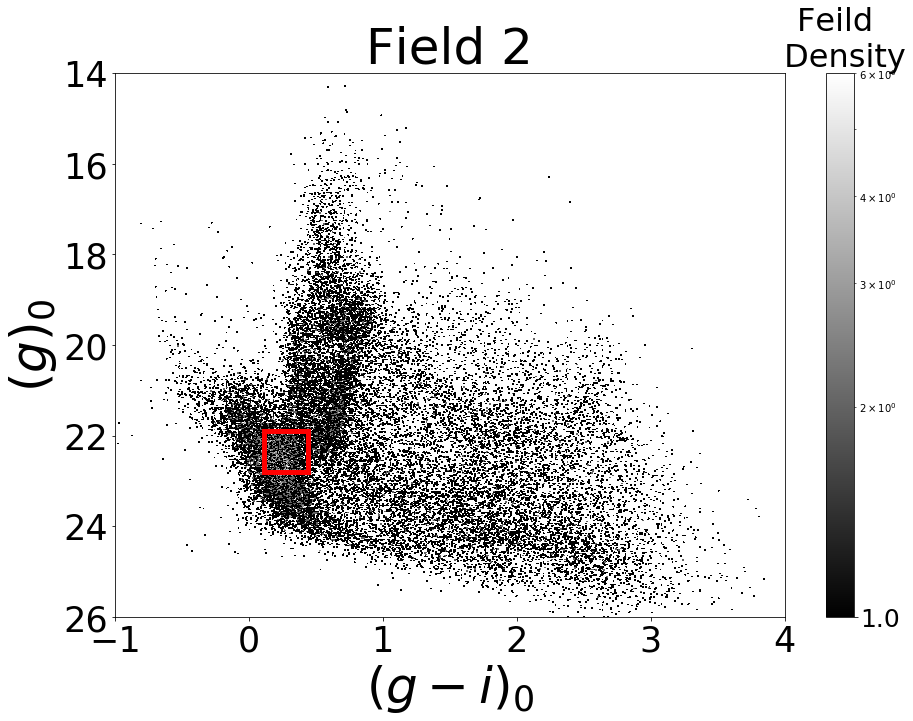

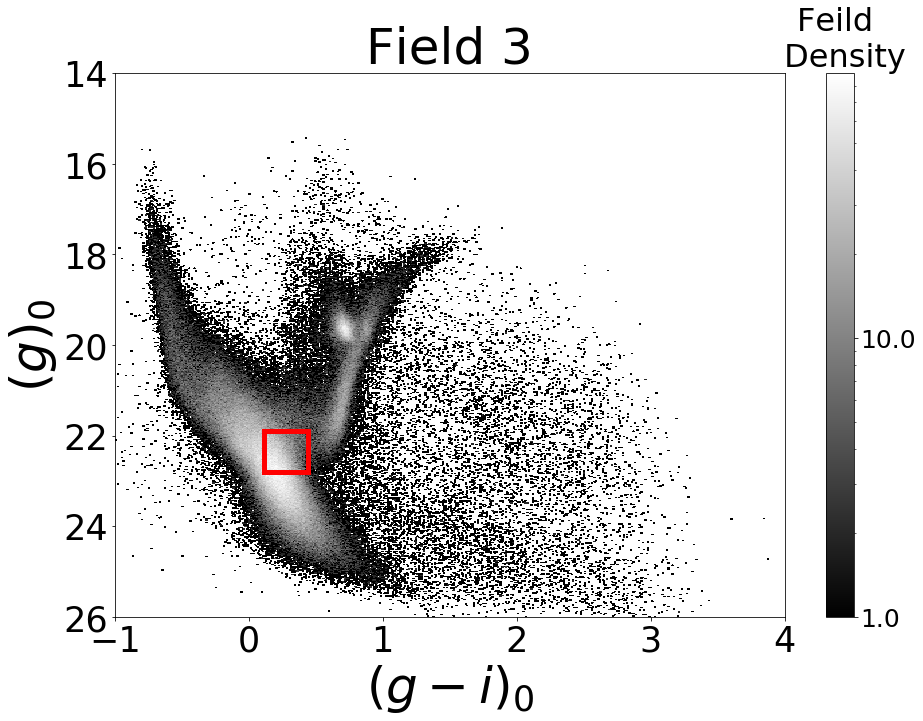

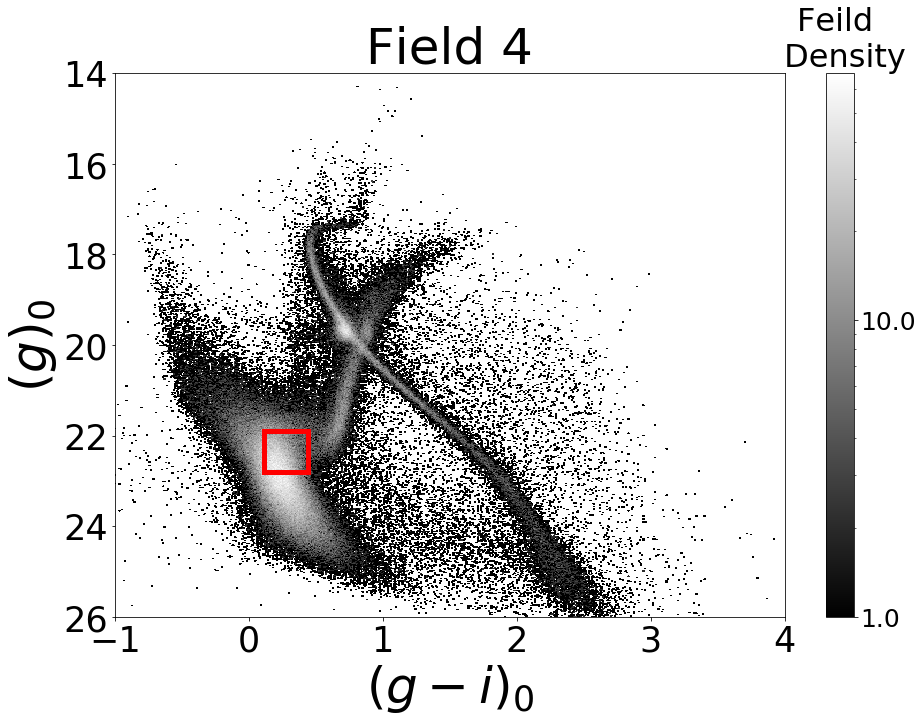

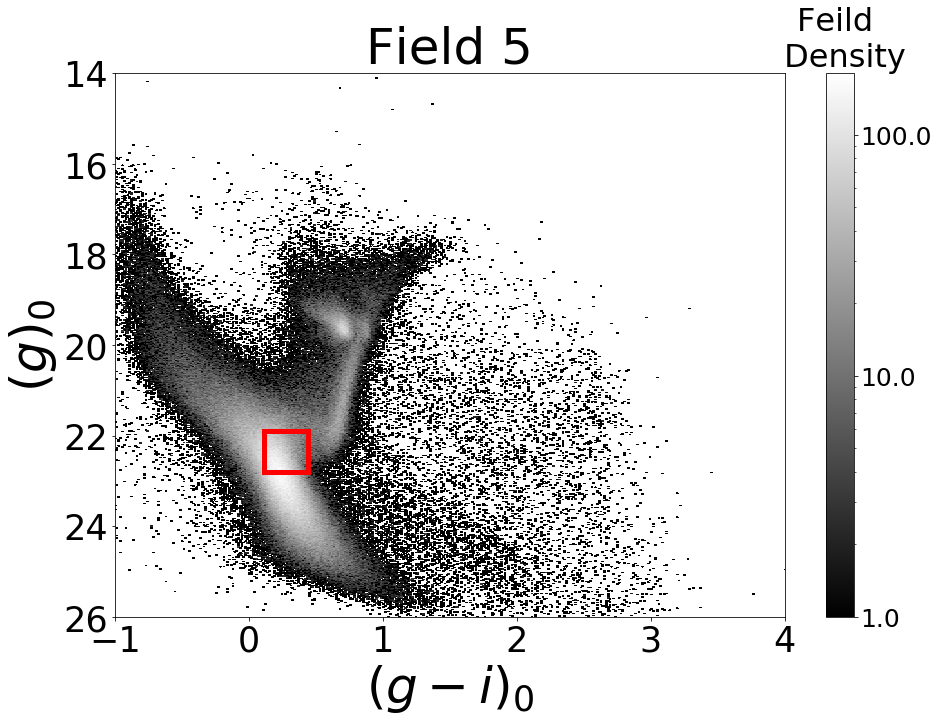

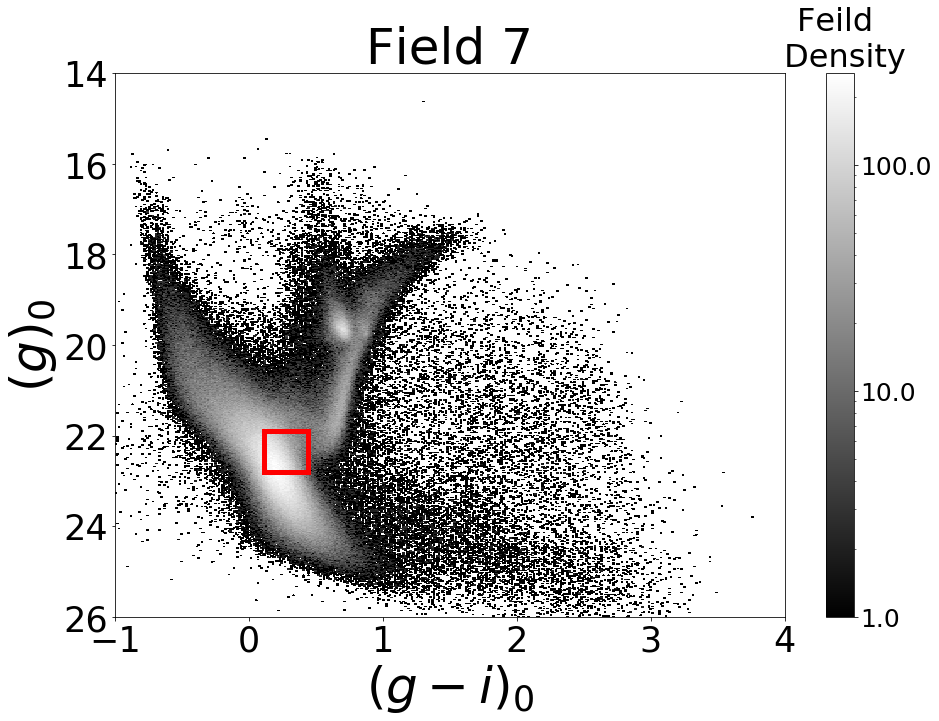

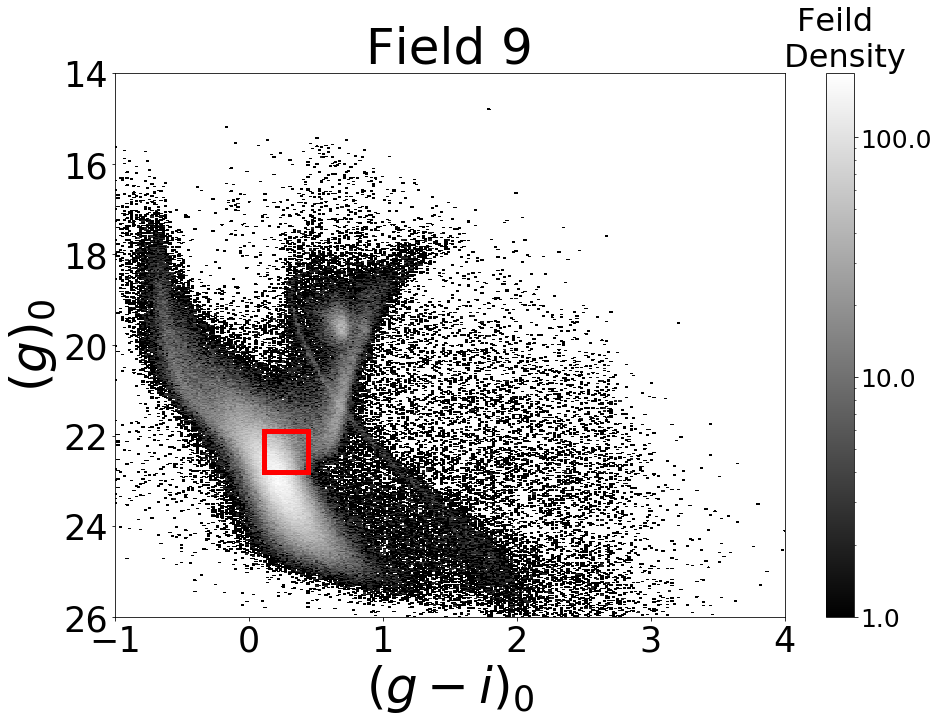

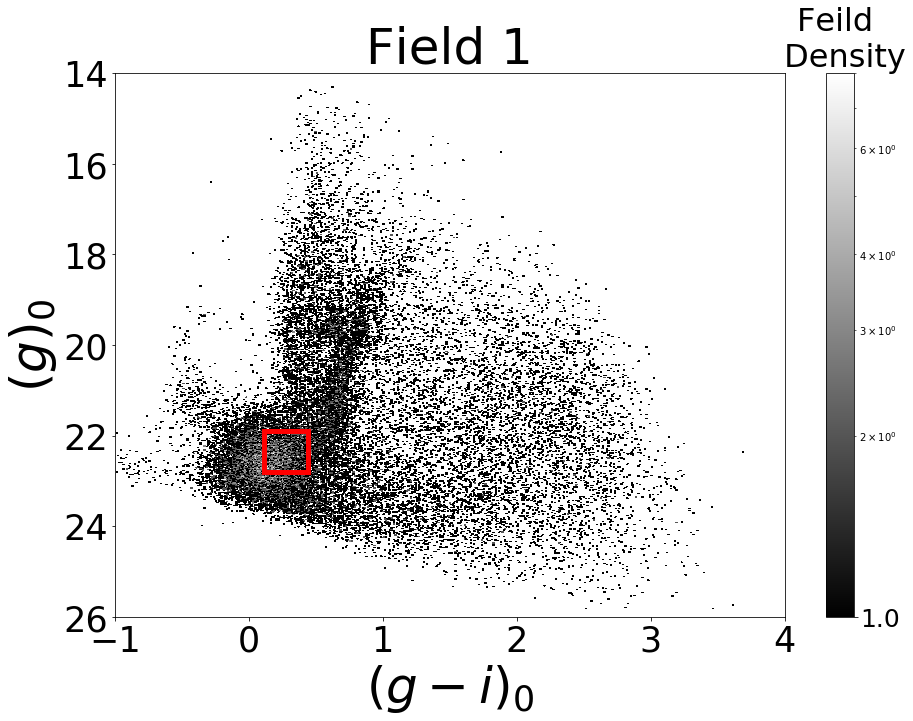

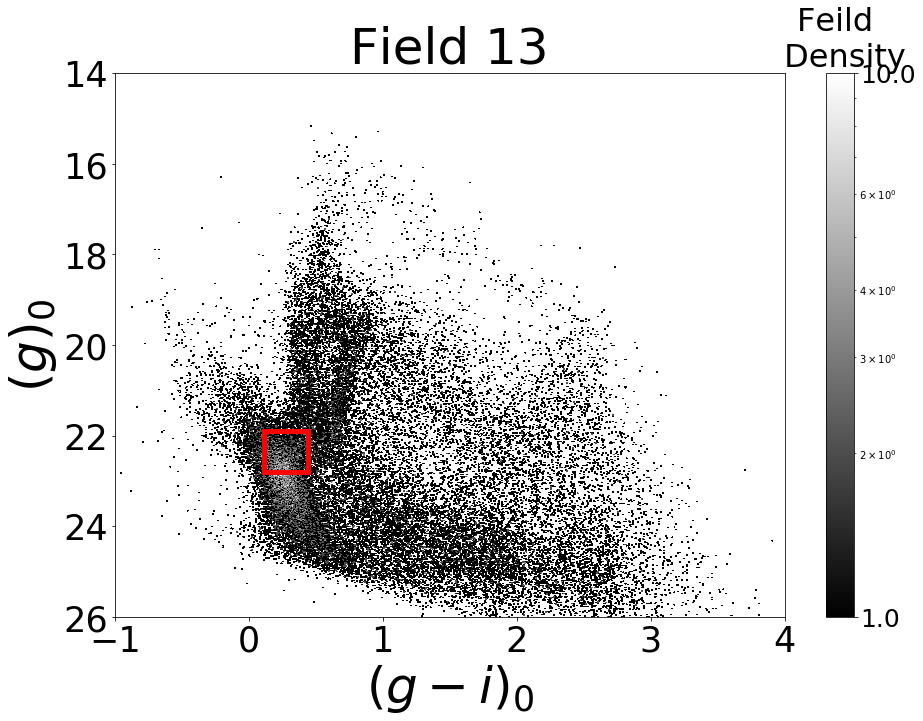

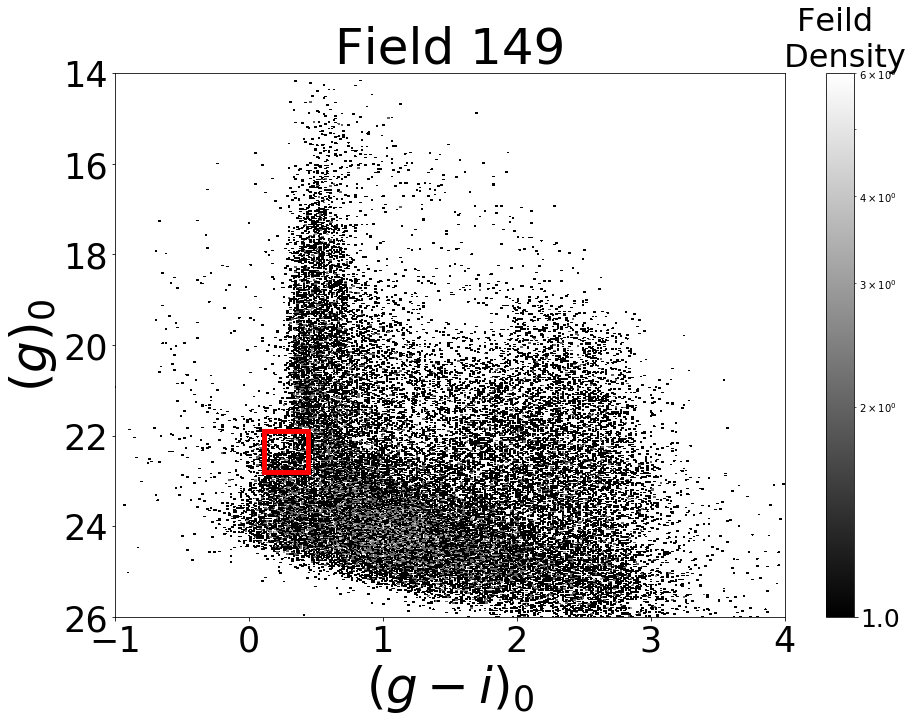

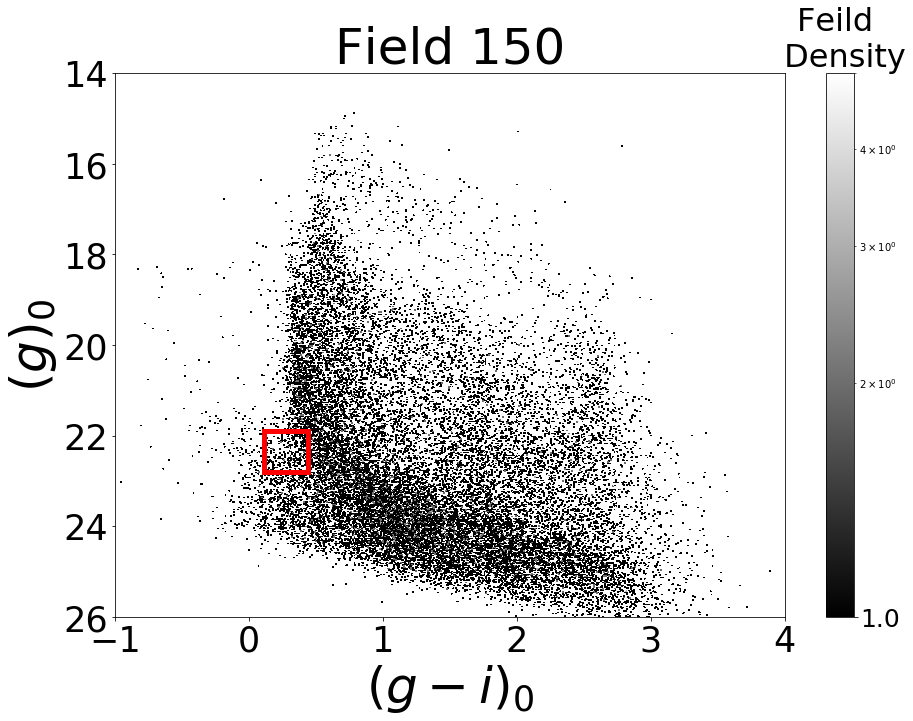

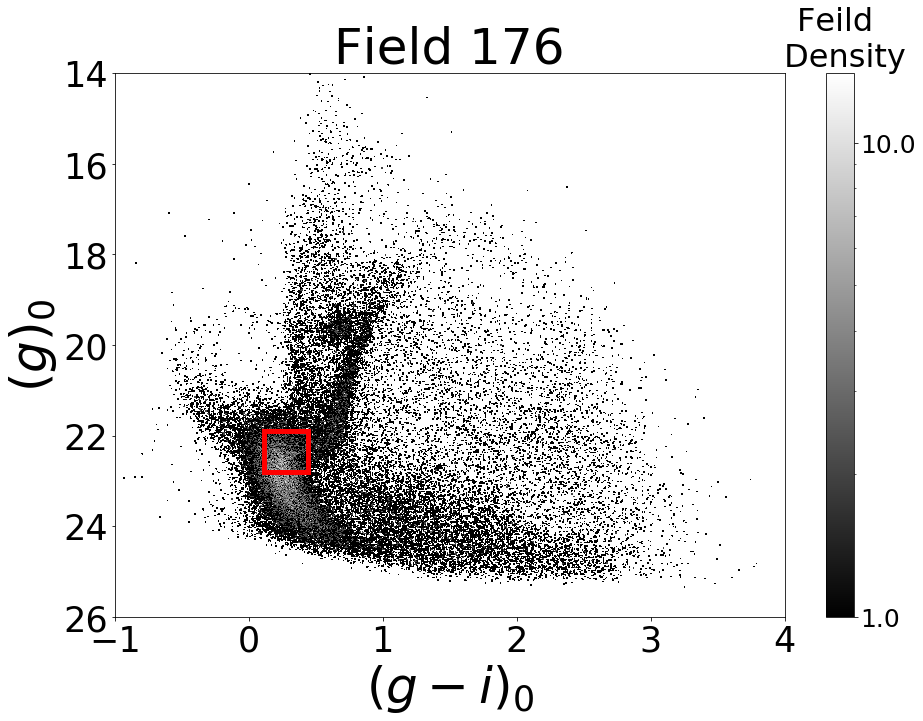

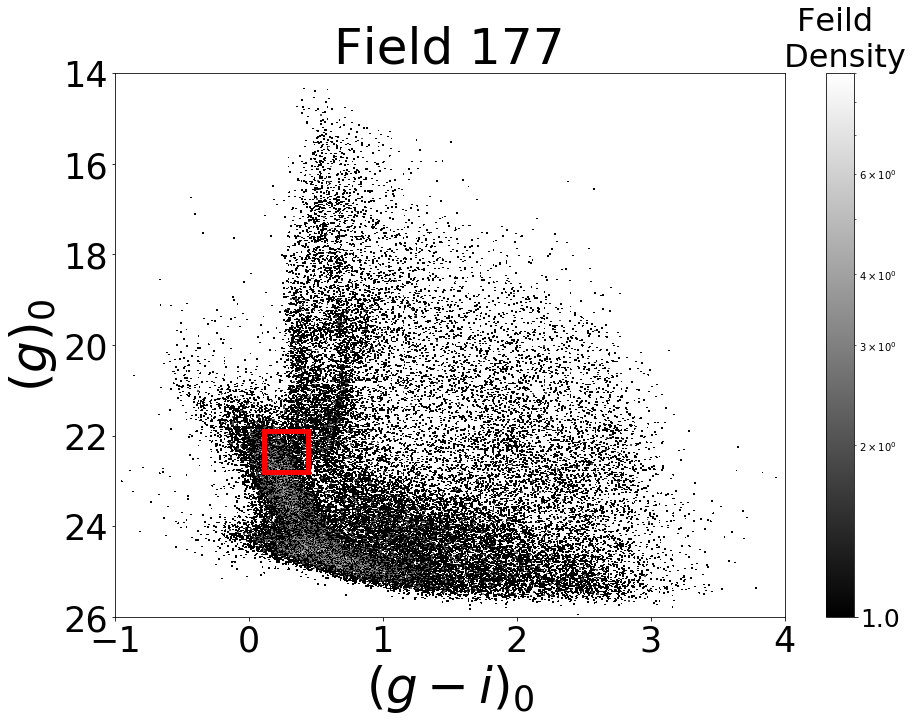

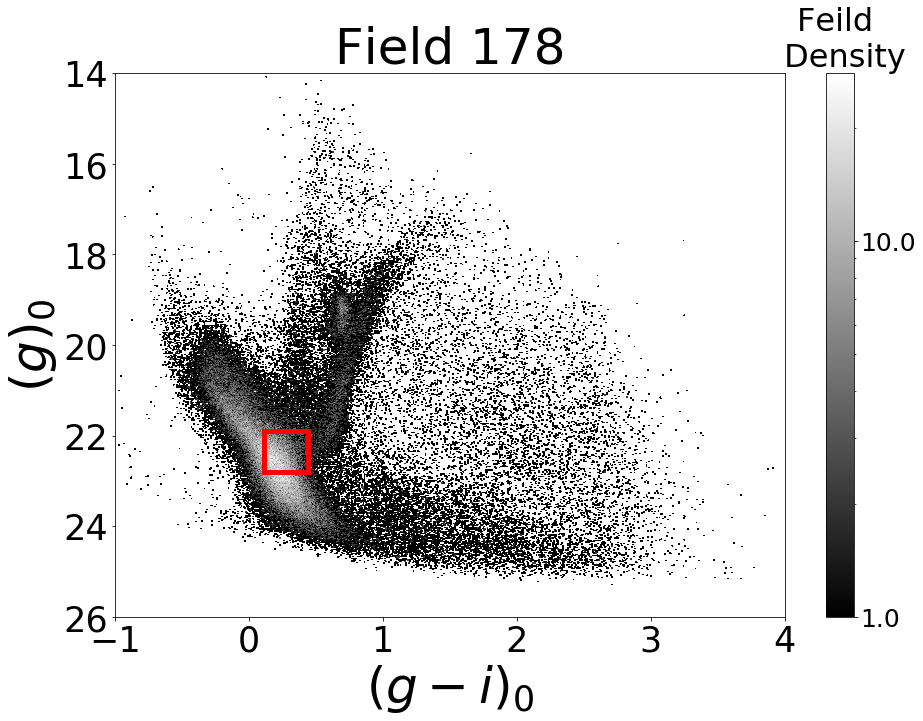

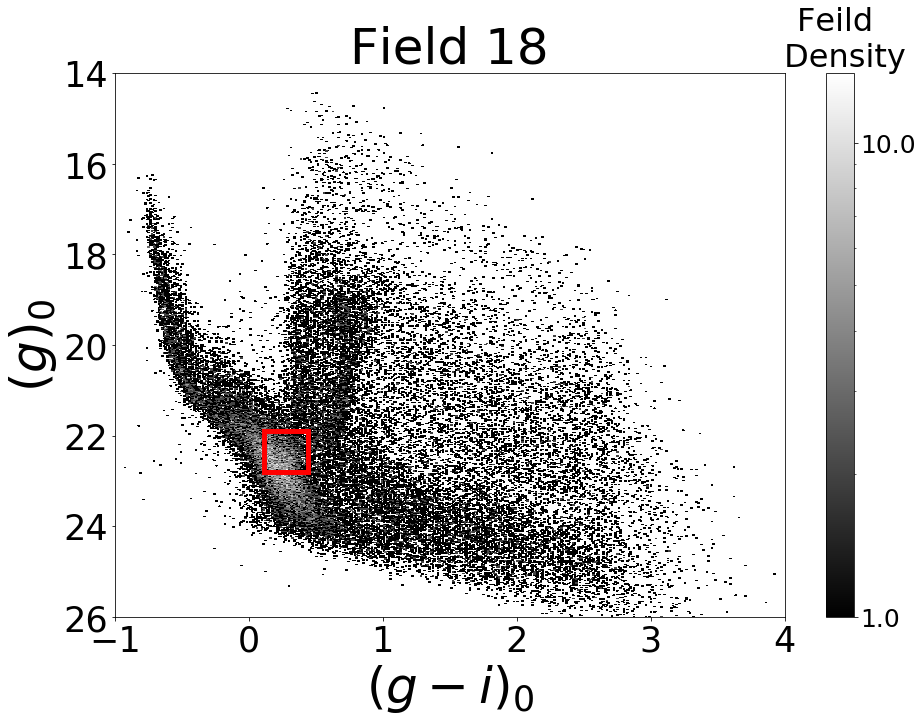

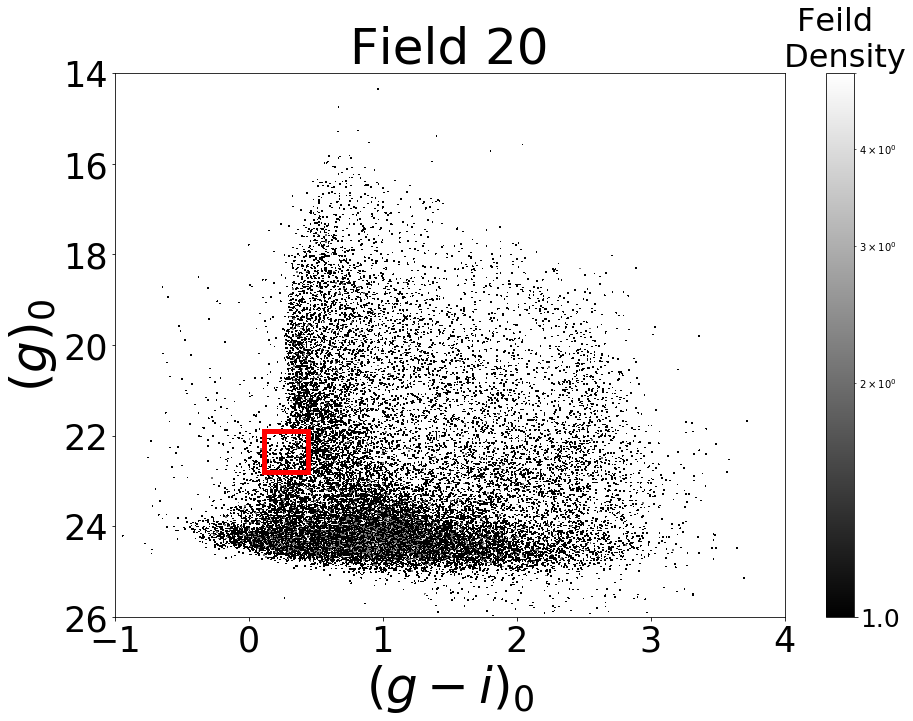

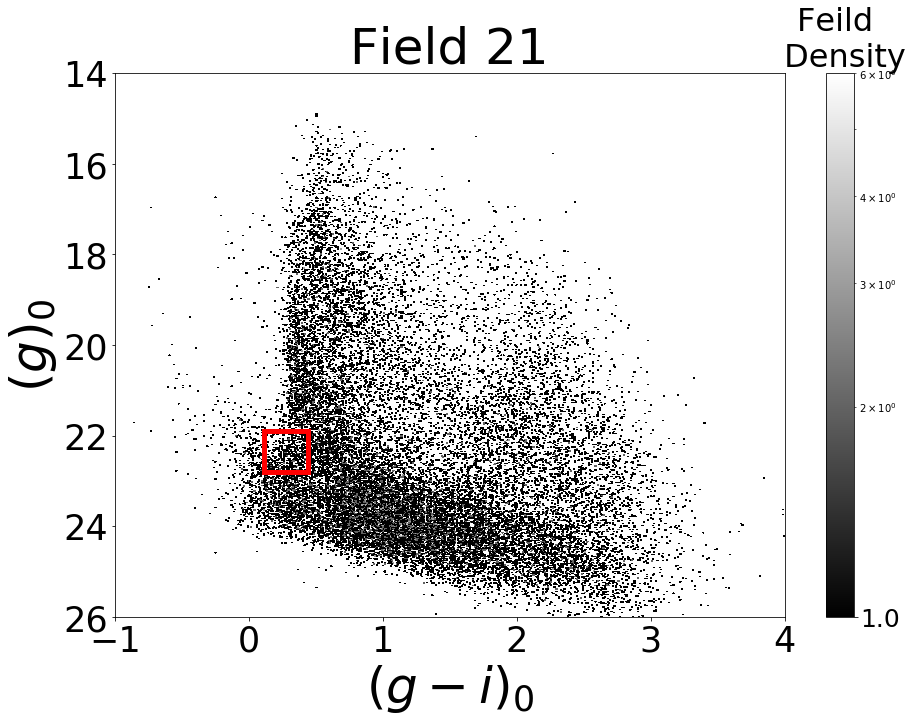

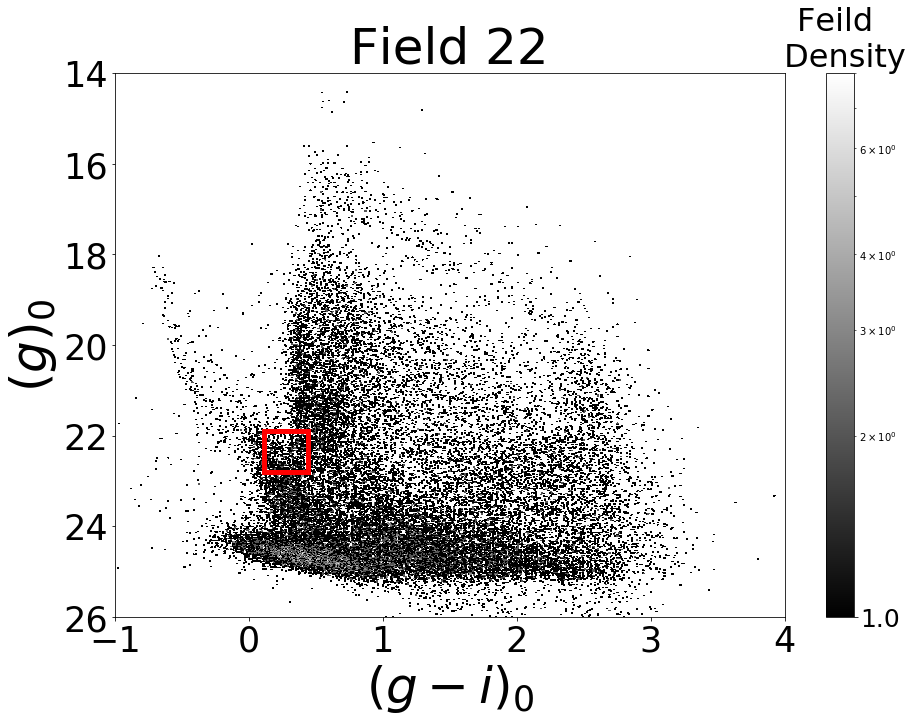

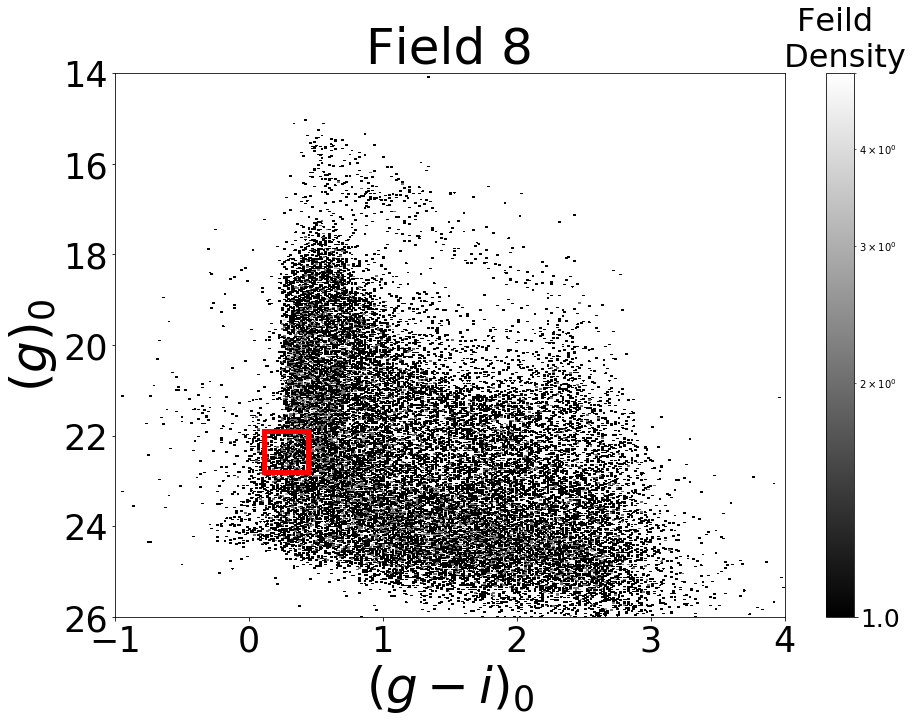

In [17]:
for number in smc:
    plot('/Users/amyel/research/SMASH_project/datafiles/SMASH_fields/vsix/starsthree/Field{}_allobj_deep_stars.fits.gz'.format(number))
